# Exploratory Data Analysis on Student's Dropout and Academic Success
#### Dataset Intro
A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes. <br>
#### Dataset Information
<b> Purpose of dataset </b><br>
- The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. <br>
- The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors. <br>
- The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course. 
#### Other Information
- The recommended data split is 80% for training and 20% for test.
- Also, the owner performed rigorous data preprocessing to handle data from anomalies, unexplanaible outliers, and missing values. So, this dataset has no missing values.

#### Import Important Libraries

In [16]:
# Data Processing; Linear algebra; Utility 
import pandas as pd # data processing
import numpy as np # for linear algebra
from pprint import pprint
from tqdm import tqdm

# Data Visualization Library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as ex
from matplotlib.font_manager import FontProperties

# Preprocessing and Post-Ops Modules from Sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder

# Models and Classifiers from Sklearn
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Dataset Exploration

In [2]:
df = pd.read_csv('dataset.csv')
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 7)
df.head(10)

,Marital status,Application mode,Application order,...,Inflation rate,GDP,Target
0,1,8,5,...,1.4,1.74,Dropout
1,1,6,1,...,-0.3,0.79,Graduate
2,1,1,5,...,1.4,1.74,Dropout
3,1,8,2,...,-0.8,-3.12,Graduate
4,2,12,1,...,-0.3,0.79,Graduate
5,2,12,1,...,0.3,-0.92,Graduate
6,1,1,1,...,2.8,-4.06,Graduate
7,1,9,4,...,2.8,-4.06,Dropout
8,1,1,3,...,0.3,-0.92,Graduate
9,1,1,1,...,1.4,3.51,Dropout


In [3]:
pprint(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

### Attribute's Description

#### Mother's Occupation

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

data = [
    (0, "Student"),
    (1, "Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers"),
    (2, "Specialists in Intellectual and Scientific Activities"),
    (3, "Intermediate Level Technicians and Professions"),
    (4, "Administrative staff"),
    (5, "Personal Services, Security and Safety Workers, and Sellers"),
    (6, "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry"),
    (7, "Skilled Workers in Industry, Construction, and Craftsmen"),
    (8, "Installation and Machine Operators and Assembly Workers"),
    (9, "Unskilled Workers"),
    (10, "Armed Forces Professions"),
    (90, "Other Situation"),
    (99, "(blank)"),
    (122, "Health professionals"),
    (123, "Teachers"),
    (125, "Specialists in information and communication technologies (ICT)"),
    (131, "Intermediate level science and engineering technicians and professions"),
    (132, "Technicians and professionals, of intermediate level of health"),
    (134, "Intermediate level technicians from legal, social, sports, cultural, and similar services"),
    (141, "Office workers, secretaries in general, and data processing operators"),
    (143, "Data, accounting, statistical, financial services, and registry-related operators"),
    (144, "Other administrative support staff"),
    (151, "Personal service workers"),
    (152, "Sellers"),
    (153, "Personal care workers and the like"),
    (171, "Skilled construction workers and the like, except electricians"),
    (173, "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans, and the like"),
    (175, "Workers in food processing, woodworking, clothing, and other industries and crafts"),
    (191, "Cleaning workers"),
    (192, "Unskilled workers in agriculture, animal production, fisheries, and forestry"),
    (193, "Unskilled workers in the extractive industry, construction, manufacturing, and transport"),
    (194, "Meal preparation assistants")
]

df_mother = pd.DataFrame(data, columns=["Occupation Index", "Occupation Name"])
df_mother[['Occupation Name', 'Occupation Index']].head(10)

,Occupation Name,Occupation Index
0,Student,0
1,"Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers",1
2,Specialists in Intellectual and Scientific Activities,2
3,Intermediate Level Technicians and Professions,3
4,Administrative staff,4
5,"Personal Services, Security and Safety Workers, and Sellers",5
6,"Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",6
7,"Skilled Workers in Industry, Construction, and Craftsmen",7
8,Installation and Machine Operators and Assembly Workers,8
9,Unskilled Workers,9


#### Father's Occupation

In [8]:
data = [
    (0, "Student"),
    (1, "Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers"),
    (2, "Specialists in Intellectual and Scientific Activities"),
    (3, "Intermediate Level Technicians and Professions"),
    (4, "Administrative staff"),
    (5, "Personal Services, Security and Safety Workers, and Sellers"),
    (6, "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry"),
    (7, "Skilled Workers in Industry, Construction, and Craftsmen"),
    (8, "Installation and Machine Operators and Assembly Workers"),
    (9, "Unskilled Workers"),
    (10, "Armed Forces Professions"),
    (90, "Other Situation"),
    (99, "(blank)"),
    (101, "Armed Forces Officers"),
    (102, "Armed Forces Sergeants"),
    (103, "Other Armed Forces personnel"),
    (112, "Directors of administrative and commercial services"),
    (114, "Hotel, catering, trade and other services directors"),
    (121, "Specialists in the physical sciences, mathematics, engineering and related techniques"),
    (122, "Health professionals"),
    (123, "Teachers"),
    (124, "Specialists in finance, accounting, administrative organization, public and commercial relations"),
    (131, "Intermediate level science and engineering technicians and professions"),
    (132, "Technicians and professionals, of intermediate level of health"),
    (134, "Intermediate level technicians from legal, social, sports, cultural and similar services"),
    (135, "Information and communication technology technicians"),
    (141, "Office workers, secretaries in general and data processing operators"),
    (143, "Data, accounting, statistical, financial services and registry-related operators"),
    (144, "Other administrative support staff"),
    (151, "Personal service workers"),
    (152, "Sellers"),
    (153, "Personal care workers and the like"),
    (154, "Protection and security services personnel"),
    (161, "Market-oriented farmers and skilled agricultural and animal production workers"),
    (163, "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence"),
    (171, "Skilled construction workers and the like, except electricians"),
    (172, "Skilled workers in metallurgy, metalworking and similar"),
    (174, "Skilled workers in electricity and electronics"),
    (175, "Workers in food processing, woodworking, clothing and other industries and crafts"),
    (181, "Fixed plant and machine operators"),
    (182, "Assembly workers"),
    (183, "Vehicle drivers and mobile equipment operators"),
    (192, "Unskilled workers in agriculture, animal production, fisheries and forestry"),
    (193, "Unskilled workers in extractive industry, construction, manufacturing and transport"),
    (194, "Meal preparation assistants"),
    (195, "Street vendors (except food) and street service providers")
]
df_father = pd.DataFrame(data, columns = ['Occupation Index', 'Occupation Name'])
df_father[['Occupation Name', 'Occupation Index']].head(10)

,Occupation Name,Occupation Index
0,Student,0
1,"Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers",1
2,Specialists in Intellectual and Scientific Activities,2
3,Intermediate Level Technicians and Professions,3
4,Administrative staff,4
5,"Personal Services, Security and Safety Workers, and Sellers",5
6,"Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",6
7,"Skilled Workers in Industry, Construction, and Craftsmen",7
8,Installation and Machine Operators and Assembly Workers,8
9,Unskilled Workers,9


In [9]:
fathers_occu_ = df_father['Occupation Name'].to_list()
mothers_occu_ = df_mother['Occupation Name'].to_list()
father_set = set(fathers_occu_)
mother_set = set(mothers_occu_)

print("Number of occupations for father: ", len(father_set))
print("Number of occupations for mother: ", len(mother_set))

print("Intersected occupations between father and mother: ", len(father_set.intersection(mother_set)))
print("Difference in occupation from father POV: ", len(father_set.difference(mother_set)))
print("Difference in occupation from mother POV: ", len(mother_set.difference(father_set)))

Number of occupations for father:  46
Number of occupations for mother:  32
Intersected occupations between father and mother:  23
Difference in occupation from father POV:  23
Difference in occupation from mother POV:  9


In [356]:
data = []
for value in df_father[['Occupation Index', 'Occupation Name']].iterrows():
    occu_name = value[1][1]
    if occu_name in df_mother['Occupation Name'].to_list():
        data.append((value[1][0], value[1][1], True, True))
    else:
        data.append((value[1][0], value[1][1], True, False))
    

for value in df_mother[['Occupation Index', 'Occupation Name']].iterrows():
    occu_name = value[1][1]
    if occu_name in df_father['Occupation Name'].to_list():
        data.append((value[1][0], value[1][1], True, True))
    else:
        data.append((value[1][0], value[1][1], False, True))


columns = ['Occupation Index', 'Occupation Name', 'Father', 'Mother']
df_combined = pd.DataFrame(data, columns=columns)


# df_combined.set_index('Occupation Index', inplace=True)
df_combined.drop_duplicates(subset = ['Occupation Index', 'Occupation Name', 'Father', 'Mother'], inplace = True)
df_combined.head()

,Occupation Index,Occupation Name,Father,Mother
0,0,Student,True,True
1,1,"Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers",True,True
2,2,Specialists in Intellectual and Scientific Activities,True,True
3,3,Intermediate Level Technicians and Professions,True,True
4,4,Administrative staff,True,True


In [357]:
diffn_occups_ = df_combined[((df_combined['Father'] == True) & (df_combined['Mother'] == False)) | ((df_combined['Father'] == False) & (df_combined['Mother'] == True))]
diffn_occups_.sort_values('Occupation Index').sample(8)

,Occupation Index,Occupation Name,Father,Mother
37,174,Skilled workers in electricity and electronics,True,False
36,172,"Skilled workers in metallurgy, metalworking and similar",True,False
73,175,"Workers in food processing, woodworking, clothing, and other industries and crafts",False,True
14,102,Armed Forces Sergeants,True,False
18,121,"Specialists in the physical sciences, mathematics, engineering and related techniques",True,False
33,161,Market-oriented farmers and skilled agricultural and animal production workers,True,False
45,195,Street vendors (except food) and street service providers,True,False
16,112,Directors of administrative and commercial services,True,False


Analysis: Upon analyzing the occupations of both fathers and mothers, a slight degree of gender bias becomes apparent. For example, cleaning workers are primarily associated with mothers, whereas occupations such as army professionals, farmers, and directors of administrative services are predominantly observed for fathers. This observation may suggest the presence of stereotypes or regional preferences influencing the likelihood of certain occupations for either parent.

Such gender bias might not pose significant issues in simple classification tasks. However, it could become a more significant problem in advanced deep neural network models that are trained to understand natural language, where gender bias can have a more pronounced impact. 

#### Index with Corresponding meaning

In [12]:
marital_status_list = [
    (1, "single"),
    (2, "married"),
    (3, "widower"),
    (4, "divorced"),
    (5, "facto union"),
    (6, "legally separated")
]

application_mode = [
    (1, "1st phase - general contingent"),
    (2, "Ordinance No. 612/93"),
    (5, "1st phase - special contingent (Azores Island)"),
    (7, "Holders of other higher courses"),
    (10, "Ordinance No. 854-B/99"),
    (15, "International student (bachelor)"),
    (16, "1st phase - special contingent (Madeira Island)"),
    (17, "2nd phase - general contingent"),
    (18, "3rd phase - general contingent"),
    (26, "Ordinance No. 533-A/99, item b2) (Different Plan)"),
    (27, "Ordinance No. 533-A/99, item b3 (Other Institution)"),
    (39, "Over 23 years old"),
    (42, "Transfer"),
    (43, "Change of course"),
    (44, "Technological specialization diploma holders"),
    (51, "Change of institution/course"),
    (53, "Short cycle diploma holders"),
    (57, "Change of institution/course (International)")
]

course_list = [
    (33, "Biofuel Production Technologies"),
    (171, "Animation and Multimedia Design"),
    (8014, "Social Service (evening attendance)"),
    (9003, "Agronomy"),
    (9070, "Communication Design"),
    (9085, "Veterinary Nursing"),
    (9119, "Informatics Engineering"),
    (9130, "Equinculture"),
    (9147, "Management"),
    (9238, "Social Service"),
    (9254, "Tourism"),
    (9500, "Nursing"),
    (9556, "Oral Hygiene"),
    (9670, "Advertising and Marketing Management"),
    (9773, "Journalism and Communication"),
    (9853, "Basic Education"),
    (9991, "Management (evening attendance)")
]

previous_qualification_list = [
    (1, "Secondary education"),
    (2, "Higher education - bachelor's degree"),
    (3, "Higher education - degree"),
    (4, "Higher education - master's"),
    (5, "Higher education - doctorate"),
    (6, "Frequency of higher education"),
    (9, "12th year of schooling - not completed"),
    (10, "11th year of schooling - not completed"),
    (12, "Other - 11th year of schooling"),
    (14, "10th year of schooling"),
    (15, "10th year of schooling - not completed"),
    (19, "Basic education 3rd cycle (9th/10th/11th year) or equiv."),
    (38, "Basic education 2nd cycle (6th/7th/8th year) or equiv."),
    (39, "Technological specialization course"),
    (40, "Higher education - degree (1st cycle)"),
    (42, "Professional higher technical course"),
    (43, "Higher education - master (2nd cycle)")
]

nationality_list = [
    (1, "Portuguese"),
    (2, "German"),
    (6, "Spanish"),
    (11, "Italian"),
    (13, "Dutch"),
    (14, "English"),
    (17, "Lithuanian"),
    (21, "Angolan"),
    (22, "Cape Verdean"),
    (24, "Guinean"),
    (25, "Mozambican"),
    (26, "Santomean"),
    (32, "Turkish"),
    (41, "Brazilian"),
    (62, "Romanian"),
    (100, "Moldova (Republic of)"),
    (101, "Mexican"),
    (103, "Ukrainian"),
    (105, "Russian"),
    (108, "Cuban"),
    (109, "Colombian")
]

mother_qualification_list  = [
    (1, "Secondary Education - 12th Year of Schooling or Eq."),
    (2, "Higher Education - Bachelor's Degree"),
    (3, "Higher Education - Degree"),
    (4, "Higher Education - Master's"),
    (5, "Higher Education - Doctorate"),
    (6, "Frequency of Higher Education"),
    (9, "12th Year of Schooling - Not Completed"),
    (10, "11th Year of Schooling - Not Completed"),
    (11, "7th Year (Old)"),
    (12, "Other - 11th Year of Schooling"),
    (14, "10th Year of Schooling"),
    (18, "General Commerce Course"),
    (19, "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv."),
    (22, "Technical-Professional Course"),
    (26, "7th Year of Schooling"),
    (27, "2nd Cycle of the General High School Course"),
    (29, "9th Year of Schooling - Not Completed"),
    (30, "8th Year of Schooling"),
    (34, "Unknown"),
    (35, "Can't Read or Write"),
    (36, "Can Read Without Having a 4th Year of Schooling"),
    (37, "Basic Education 1st Cycle (4th/5th Year) or Equiv."),
    (38, "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv."),
    (39, "Technological Specialization Course"),
    (40, "Higher Education - Degree (1st Cycle)"),
    (41, "Specialized Higher Studies Course"),
    (42, "Professional Higher Technical Course"),
    (43, "Higher Education - Master (2nd Cycle)"),
    (44, "Higher Education - Doctorate (3rd Cycle)")
]


father_qualification_list = [
    (1, "Secondary Education - 12th Year of Schooling or Eq."),
    (2, "Higher Education - Bachelor's Degree"),
    (3, "Higher Education - Degree"),
    (4, "Higher Education - Master's"),
    (5, "Higher Education - Doctorate"),
    (6, "Frequency of Higher Education"),
    (9, "12th Year of Schooling - Not Completed"),
    (10, "11th Year of Schooling - Not Completed"),
    (11, "7th Year (Old)"),
    (12, "Other - 11th Year of Schooling"),
    (13, "2nd Year Complementary High School Course"),
    (14, "10th Year of Schooling"),
    (18, "General Commerce Course"),
    (19, "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv."),
    (20, "Complementary High School Course"),
    (22, "Technical-Professional Course"),
    (25, "Complementary High School Course - Not Concluded"),
    (26, "7th Year of Schooling"),
    (27, "2nd Cycle of the General High School Course"),
    (29, "9th Year of Schooling - Not Completed"),
    (30, "8th Year of Schooling"),
    (31, "General Course of Administration and Commerce"),
    (33, "Supplementary Accounting and Administration"),
    (34, "Unknown"),
    (35, "Can't Read or Write"),
    (36, "Can Read Without Having a 4th Year of Schooling"),
    (37, "Basic Education 1st Cycle (4th/5th Year) or Equiv."),
    (38, "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv."),
    (39, "Technological Specialization Course"),
    (40, "Higher Education - Degree (1st Cycle)"),
    (41, "Specialized Higher Studies Course"),
    (42, "Professional Higher Technical Course"),
    (43, "Higher Education - Master (2nd Cycle)"),
    (44, "Higher Education - Doctorate (3rd Cycle)")
]

In [13]:
feature_data = [
    ('Marital status', 'Integer', 'Single; Married; Widower; Divorced; Facto Union; Legally Separated'),
    ('Application mode', 'Integer', 'Different modes of applying'),
    ('Application order', 'Integer', 'Application order (between 0 - first choice; and 9 last choice)'),
    ('Course', 'Integer', 'Different courses to choose from'),
    ('Daytime / evening attendance', 'Integer', '1 - Daytime; 0 - Evening'),
    ('Previous qualification', 'Integer', 'Qualification before choosing this course'),
    ('Nationality', 'Integer', "Student's nationality"),
    ('Mother qualification', 'Integer', "Mother's qualification"),
    ('Father qualification', 'Integer', "Father's qualification"),
    ('Mother occupation', 'Integer', "Mother's occupation"),
    ('Father Occupation', 'Integer', "Father's Occupation"),
    ('Displaced', 'Integer', 'Y / N'),
    ('Educational special needs', 'Integer', 'Y / N'),
    ('Debtor', 'Integer', 'Y / N'),
    ('Tuition fess upto date', 'Integer', 'Y / N'),
    ('Gender', 'Integer', '1 - male / 0 - female'),
    ('Scholarship holder', 'Integer', 'Y / N'),
    ('Age at enrollment', 'Integer', 'Age of student at enrollment'),
    ('International', 'Integer', 'Y / N'),
    ('Curricular units 1st sem (Credited)', 'Integer', 'Number of curricular units credited in the 1st semester'),
    ('Curricular units 1st sem (Enrolled)', 'Integer', 'Number of curricular units enrolled in the 1st semester'),
    ('Curricular units 1st sem (Evaluations)', 'Integer', 'Number of evaluations to curricular units in the 1st semester'),
    ('Curricular units 1st sem (Approved)', 'Integer', 'Number of curricular units approved in the 1st semester'),
    ('Curricular units 1st sem (Grade)', 'Integer', 'Grade average in the 1st semester (between 0 and 20)'),
    ('Curricular units 1st sem (Without Evaluations)', 'Integer', 'Number of curricular units without evaluations in the 1st semester'),
    
    ('Curricular units 2nd sem (Credited)', 'Integer', 'Number of curricular units credited in the 2nd semester'),
    ('Curricular units 2nd sem (Enrolled)', 'Integer', 'Number of curricular units enrolled in the 2nd semester'),
    ('Curricular units 2nd sem (Evaluations)', 'Integer', 'Number of evaluations to curricular units in the 2nd semester'),
    ('Curricular units 2nd sem (Approved)', 'Integer', 'Number of curricular units approved in the 2nd semester'),
    ('Curricular units 2nd sem (Grade)', 'Integer', 'Grade average in the 2nd semester (between 0 and 20)'),
    ('Curricular units 2nd sem (Without Evaluations)', 'Integer', 'Number of curricular units without evaluations in the 2nd semester'),
    ('Unemployment rate', 'Continuous', 'Unemployment rate (%)'),
    ('Inflation rate', 'Continuous', 'Inflation rate (%)'),
    ('GDP', 'Continuous', 'GDP'),
    ('Target', 'Categorical', 'The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the nominal duration of the course')
]

feature_df = pd.DataFrame(feature_data, columns = ['Feature', 'Type', 'Description'])
feature_df

,Feature,Type,Description
0,Marital status,Integer,Single; Married; Widower; Divorced; Facto Union; Legally Separated
1,Application mode,Integer,Different modes of applying
2,Application order,Integer,Application order (between 0 - first choice; and 9 last choice)
3,Course,Integer,Different courses to choose from
4,Daytime / evening attendance,Integer,1 - Daytime; 0 - Evening
5,Previous qualification,Integer,Qualification before choosing this course
6,Nationality,Integer,Student's nationality
7,Mother qualification,Integer,Mother's qualification
8,Father qualification,Integer,Father's qualification
9,Mother occupation,Integer,Mother's occupation


#### Feature Engineering

In [24]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

NoneType

- No null values in any feature column. 
- Total features 34 with last 35th as the target variable.

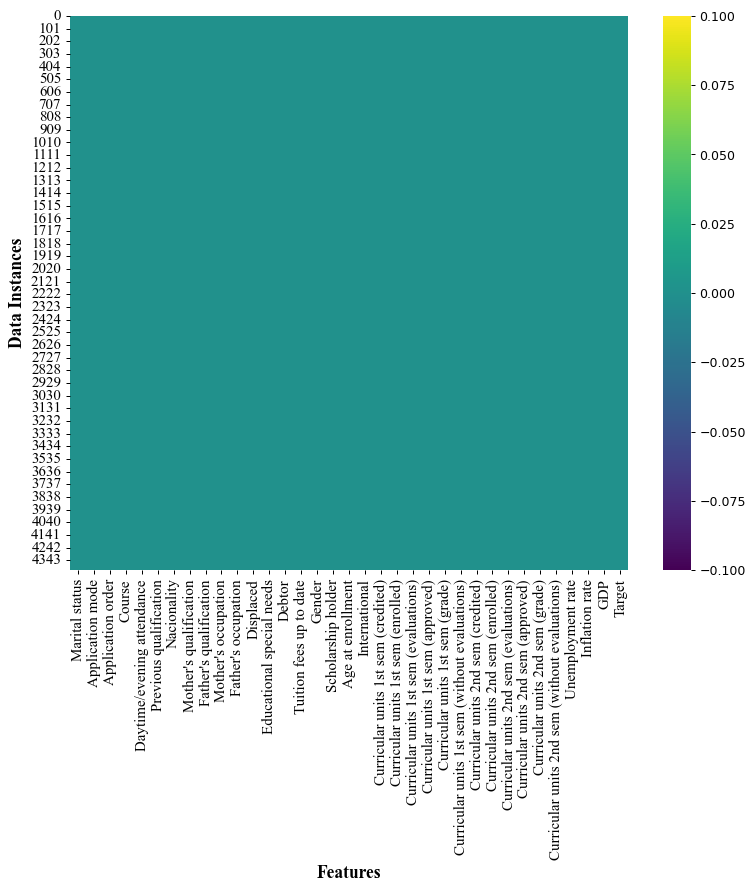

In [23]:
plt.figure(figsize=(10, 8), dpi = 90)
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 14, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)

ax = sns.heatmap(df.isnull(), cmap = 'viridis')
plt.tick_params(axis='both', which='both', labelsize = 10)
# legend_1 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['THA076BCT028\nTHA076BCT048'], handlelength=0, handletextpad=0, fancybox=True, prop=font)
# legend_1.set_bbox_to_anchor((1.010, 1.10))

# cbar = ax.collections[0].colorbar
# cbar.ax.set_aspect(20)  # Adjust the value as needed to increase the gap

plt.xticks(rotation = 'vertical', font = font_xticks)
plt.yticks(font = font_yticks)
plt.xlabel("Features", font = font_label)
plt.ylabel("Data Instances", font = font_label)
plt.savefig('./Figures/Null features.png', dpi = 300, bbox_inches = 'tight')

plt.show()

On observing the heatmap of null values presence in the dataset, there is no any presence of 'nan' or null in any cases. Also there are no any duplicated data in the dataset.  

In [19]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [20]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

Hence, there is no null, and no duplicates in the dataset. 

#### Dataset Analysis

In [353]:
target_counts = df['Target'].value_counts()
target_counts

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

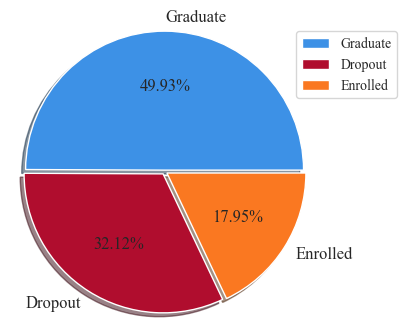

In [354]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 10)

plt.figure(figsize=(4, 4)) 
colors = [(0.24, 0.57, 0.90), (0.69, 0.05, 0.18) , (0.98, 0.47, 0.13)]
plt.pie(target_counts, labels = target_counts.index, explode = (0.01, 0.02, 0.02), autopct='%1.2f%%', colors = colors, textprops = {'family':'Times New Roman', 'size' : 12},  shadow = True)
plt.axis('equal')
legend_1 = plt.legend(prop = font_label)
legend_1.set_bbox_to_anchor((0.90, 0.98))
plt.savefig('./Figures/Dataset Composition.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Approximately, 50% of the students in this dataset have graduated. 

#### Demographics

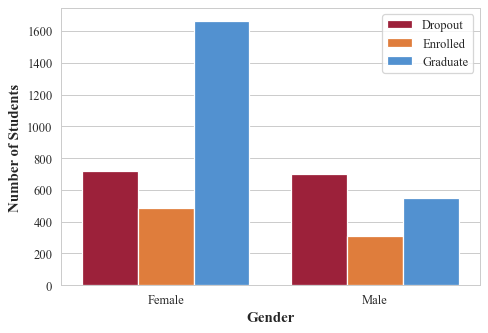

In [355]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 12, weight = 'bold')
font_ticks = FontProperties(family='Times New Roman', size = 10)
plt.figure(figsize = (6, 4), dpi = 90)
sns.set_style('whitegrid')
colors = [(0.69, 0.05, 0.18), (0.98, 0.47, 0.13), (0.24, 0.57, 0.90)]
sns.countplot(data = df, x = 'Gender', hue = 'Target', hue_order=['Dropout', 'Enrolled', 'Graduate'], palette = colors)

plt.xticks(ticks=[0,1], labels = ['Female','Male'], font = font_ticks)
plt.yticks(font = font_ticks)

plt.ylabel('Number of Students', font = font_label)
plt.xlabel('Gender', font = font_label)
plt.legend(prop = font_ticks)
plt.savefig('./Figures/gender and target.png', dpi = 300, bbox_inches = 'tight')
plt.show()

According to the countplot, higher number of graduates are female. However, females also have the highest number of dropouts, although the difference compared to males is small. 

#### Marital Status

In [95]:
df['Marital status'].value_counts()

Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

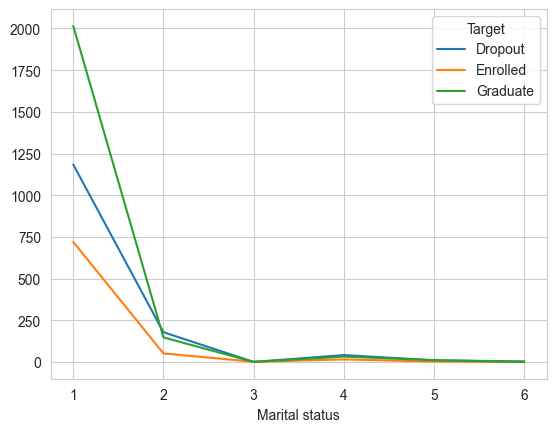

In [102]:
ms_target_df = pd.crosstab(index = df['Marital status'], columns=df['Target'], margins=True)
ms_target_df.drop('All',axis = 1, inplace = True)
ms_target_df.drop('All',axis = 0, inplace = True)
ms_target_df.plot(kind='line')
plt.show()

Obviously, it shows that students, who are single are more involved in studies, so as their dropout, graduation and enrollment rate appears. 

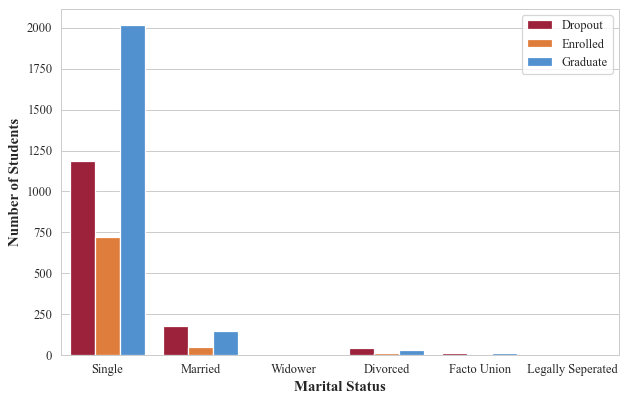

In [122]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 12, weight = 'bold')
font_ticks = FontProperties(family='Times New Roman', size = 10)
plt.figure(figsize = (8, 5), dpi = 90)

colors = [(0.69, 0.05, 0.18), (0.98, 0.47, 0.13) , (0.24, 0.57, 0.90)]
sns.countplot(data = df, x = 'Marital status', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'], palette = colors)

plt.xlabel('Marital Status', font = font_label)
plt.ylabel('Number of Students', font = font_label)

plt.xticks(ticks=[0,1,2,3,4,5], labels = ['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'], font = font_ticks)
plt.yticks(font = font_ticks)
plt.legend(prop = font_ticks)
plt.savefig("./Figures/marital status and target.png", dpi = 300, bbox_inches = 'tight')
plt.show()

On observing this particular count plot for all the marital status, the major insights is that majority of the students are single, and second to that are the Married ones. Whereas there are no any Widower or Legally separated student enrolled in any course. Obviously the single are more graduated than the married students, and similarly the single students are the most dropouts.

#### Application Mode
Method of application used by student.

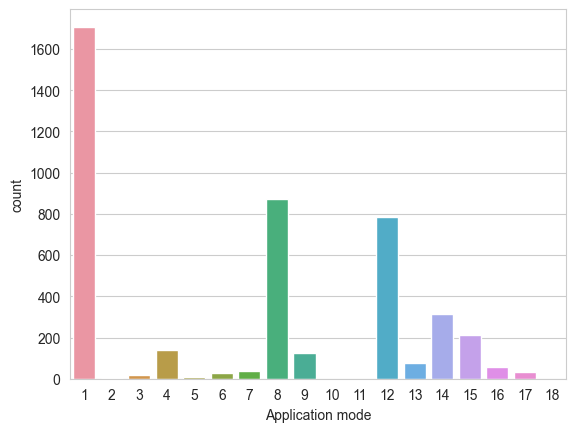

In [113]:
sns.countplot(x=df['Application mode'])
plt.show()

This barplot shows that most of the student applies through 1. i.e. 1st phase - general contingent. But, this insights isn't helpful at all.

In [114]:
application_mode_target_df = pd.crosstab(df['Target'],df['Application mode'],margins=True)
application_mode_target_df

Application mode,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,All
Target,,,,,,,,,,,,,,,,,,,
Dropout,345,2,2,85,3,5,5,256,45,1,1,435,34,115,63,20,4,0,1421
Enrolled,300,0,8,7,0,10,8,159,16,0,0,121,11,75,56,13,10,0,794
Graduate,1063,1,6,47,7,15,25,457,63,0,0,229,32,122,94,26,21,1,2209
All,1708,3,16,139,10,30,38,872,124,1,1,785,77,312,213,59,35,1,4424


No, such important insights from this. This particular columns isn't important for feature engineering.

In [115]:
course_target_df = pd.crosstab(df['Target'], df['Course'],margins=True)
course_target_df

Course,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,All
Target,,,,,,,,,,,,,,,,,,
Dropout,8,82,71,86,51,90,92,78,134,65,96,118,33,95,101,85,136,1421
Enrolled,3,37,21,37,42,75,64,21,108,42,41,100,17,48,34,50,54,794
Graduate,1,96,123,87,133,172,14,42,138,248,115,548,36,125,196,57,78,2209
All,12,215,215,210,226,337,170,141,380,355,252,766,86,268,331,192,268,4424


In [116]:
maxm_dropout_course = course_target_df.drop('All', axis = 1).loc['Dropout'].idxmax()
maxm_graduated_course = course_target_df.drop('All', axis = 1).loc['Graduate'].idxmax()
maxm_enrolled_course = course_target_df.drop('All', axis = 1).loc['Enrolled'].idxmax()

In [117]:
print(f"Student taking course : '{course_list[maxm_dropout_course - 1][1]}' are most dropouts.")
print(f"Student taking course : '{course_list[maxm_graduated_course - 1][1]}' are most graduated.")
print(f"Student taking course : '{course_list[maxm_enrolled_course - 1][1]}' are most enrolled.")

Student taking course : 'Management (evening attendance)' are most dropouts.
Student taking course : 'Nursing' are most graduated.
Student taking course : 'Management' are most enrolled.


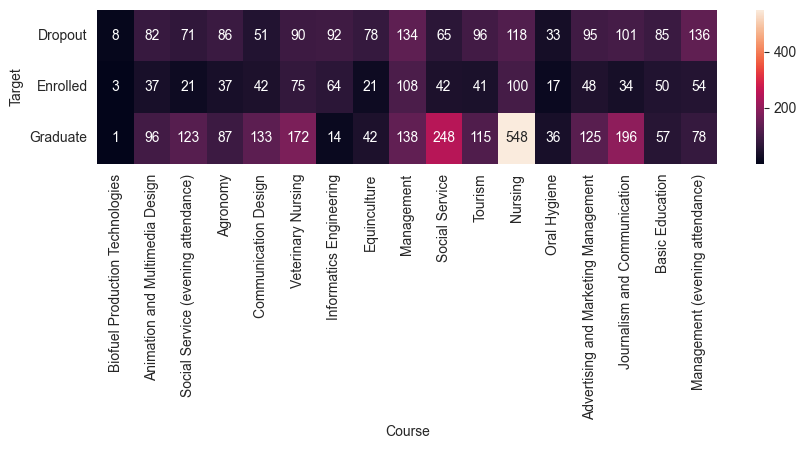

In [118]:
# Create a heatmap
plt.figure(figsize=(10, 2)) 
sns.heatmap(course_target_df.iloc[:-1, :].drop('All', axis = 1), annot=True, fmt='d', cbar=True)

xticks_labels = [value[1] for value in course_list]
xticks_positions = [pos + 0.5 for pos in range(len(xticks_labels))]


plt.xlabel('Course')
plt.ylabel('Target')
plt.xticks(xticks_positions, xticks_labels , rotation = 90)
# plt.title('Cross-Tabulation Heatmap')

# Show the plot
plt.show()

<Figure size 720x450 with 0 Axes>

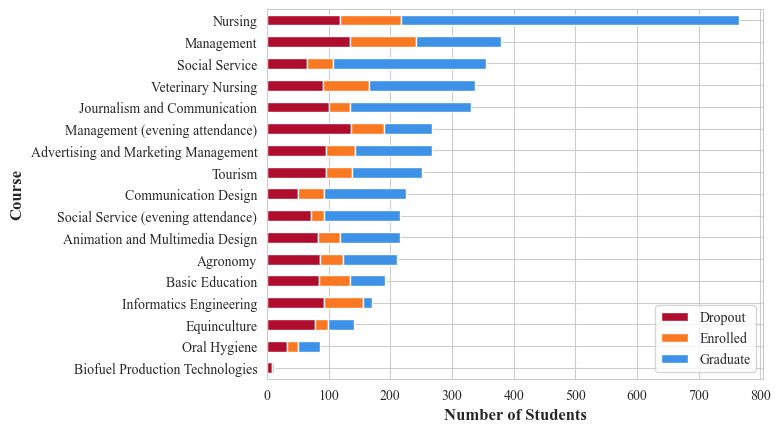

In [130]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 12, weight = 'bold')
font_ticks = FontProperties(family='Times New Roman', size = 10)
plt.figure(figsize = (8, 5), dpi = 90)

colors = [(0.69, 0.05, 0.18), (0.98, 0.47, 0.13), (0.24, 0.57, 0.90)]

student_course = df.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

std_course = {count + 1: value[1] for count, value in enumerate(course_list)}
student_course = student_course.rename(index = std_course)

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True, color = colors)

plt.xlabel('Number of Students', font = font_label)
plt.ylabel('Course', font = font_label)
plt.xticks(font = font_ticks)
plt.yticks(font = font_ticks)
plt.legend(prop = font_ticks)
plt.savefig('./Figures/Course vs Target.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Nursing course produced the highest number of graduates while management course has the highest number of droputs.

#### What % of gender distribution could be observed in garduated with 'Nursing' course?

In [131]:
temp_df = df[df['Target'] == 'Graduate']
pd.crosstab(index = temp_df['Gender'], columns = temp_df['Course'])

Course,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Gender,,,,,,,,,,,,,,,,,
0,1,47,103,34,85,152,0,27,101,227,83,460,32,79,135,55,40
1,0,49,20,53,48,20,14,15,37,21,32,88,4,46,61,2,38


A heatmap for course with targets, we can observe that student under 'Nursing' are the most graduates, then after the social services are second to them. One interpretation could be the tendency of females towards helping others, that more females are involved in nursing and social services. <br>
Whereas on the dropouts, we could observe that students taking 'Management' are more likely to drop their course. 

#### Student Nationality

<Figure size 720x450 with 0 Axes>

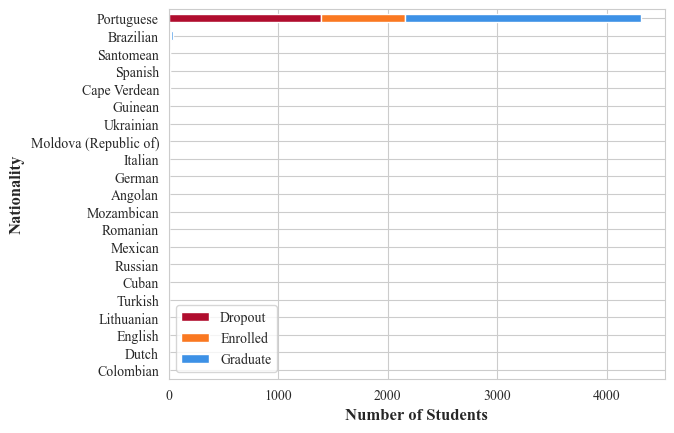

In [135]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 12, weight = 'bold')
font_ticks = FontProperties(family='Times New Roman', size = 10)
plt.figure(figsize = (8, 5), dpi = 90)

colors = [(0.69, 0.05, 0.18), (0.98, 0.47, 0.13), (0.24, 0.57, 0.90)]
student_nationality = df.groupby(['Nacionality', 'Target']).size().reset_index().pivot(columns='Target', index='Nacionality', values=0)

# Rename the index of the DataFrame
std_nationality = {count + 1 : value[1] for count, value in enumerate(nationality_list)}
student_nationality = student_nationality.rename(index = std_nationality)

student_nationality_total = student_nationality.sum(axis=1)
student_nationality_sorted = student_nationality_total.sort_values(ascending=True)
student_nationality.loc[student_nationality_sorted.index].plot(kind = 'barh', stacked = True, color = colors)

plt.xlabel('Number of Students', font = font_label)
plt.ylabel('Nationality', font = font_label)

plt.xticks(font = font_ticks)
plt.yticks(font = font_ticks)
plt.legend(prop = font_ticks)
plt.savefig("./Figures/nacionality.png", dpi = 300, bbox_inches = 'tight')
plt.show()


The plot shows that the majority of the students in the dataset are Portuguese, which accounts for the highest frequency among all the nationalities.

#### Displaced Feature
'Displace Student' - a "displaced person" refers to someone who has been forced to leave their usual place of residence or origin due to various reasons

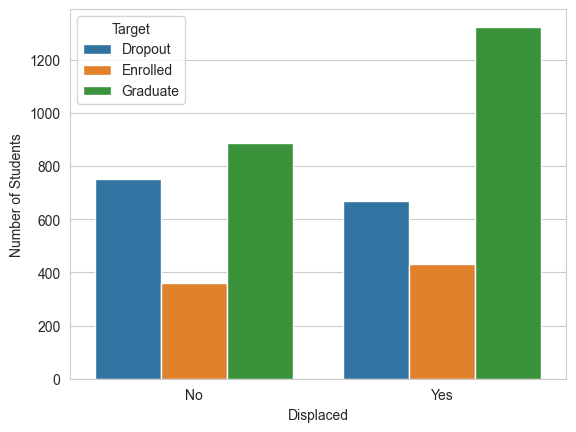

In [136]:
sns.countplot(data = df, x='Displaced', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

Students who already graduated are mostly displaced students.

#### International

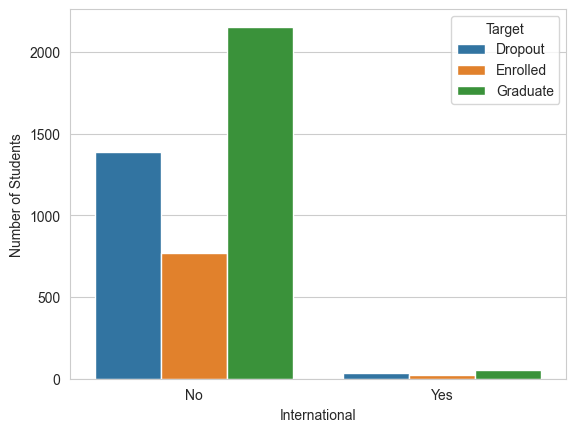

In [137]:
colors = [(0.69, 0.05, 0.18), (0.98, 0.47, 0.13),  (0.24, 0.57, 0.90)]
sns.countplot(data = df, x='International', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

Since Portuguese students dominate the data, it is reflected to numbers of students vs. international bar plot.

<Figure size 720x450 with 0 Axes>

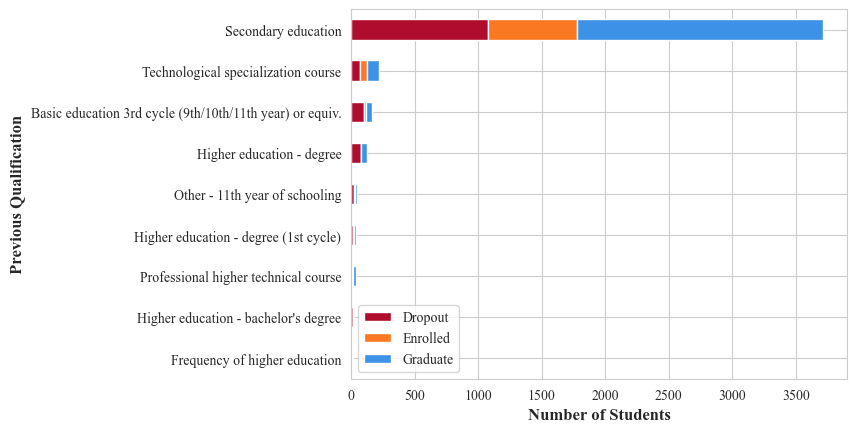

In [140]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 12, weight = 'bold')
font_ticks = FontProperties(family='Times New Roman', size = 10)
plt.figure(figsize = (8, 5), dpi = 90)

colors = [(0.69, 0.05, 0.18), (0.98, 0.47, 0.13), (0.24, 0.57, 0.90)]

student_prequal = df.groupby(['Previous qualification', 'Target']).size().reset_index().pivot(columns='Target', index='Previous qualification', values=0)

pre_qua = {count + 1 : value[1] for count, value in enumerate(previous_qualification_list)}
student_prequal = student_prequal.rename(index = pre_qua)

student_prequal_total = student_prequal.sum(axis=1)
student_prequal_sorted = student_prequal_total.sort_values(ascending=True)
student_prequal_top = student_prequal_sorted[8:]

student_prequal.loc[student_prequal_top.index].plot(kind='barh', stacked=True, color = colors)


plt.xlabel('Number of Students', font = font_label)
plt.ylabel('Previous Qualification', font = font_label)
plt.xticks(font = font_ticks)
plt.yticks(font = font_ticks)
plt.legend(prop = font_ticks)
plt.savefig('./Figures/previous qualification.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Most of the students in the data finished secondary education. 

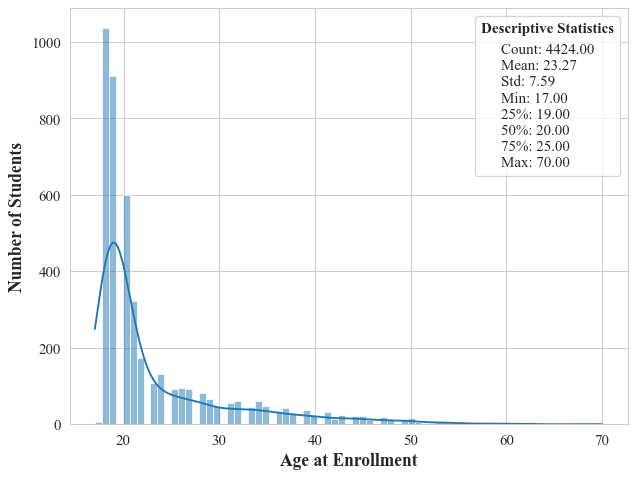

In [164]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 14, weight = 'bold')
font_ticks = FontProperties(family='Times New Roman', size = 12)
legend_title = FontProperties(family='Times New Roman', size = 12, weight = 'bold')

plt.figure(figsize = (8, 6), dpi = 90)


sns.histplot(data=df, x='Age at enrollment', kde=True)

stats = df['Age at enrollment'].describe()


stats_str = '\n'.join([f"{key.capitalize()}: {value:.2f}" for key, value in stats.items()])


legend_1 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], [stats_str], handlelength=0, handletextpad=0, fancybox=True, prop = font, title = 'Descriptive Statistics', title_fontproperties = legend_title, loc = 'upper right')

plt.xlabel('Age at Enrollment', fontproperties=font_label)
plt.ylabel('Number of Students', fontproperties=font_label)
plt.xticks(fontproperties=font_ticks)
plt.yticks(fontproperties=font_ticks)

plt.savefig("./Figures/age at enrollment.png", dpi = 300, bbox_inches = 'tight')
# Show the plot
plt.show()

The distribution of age at enrolment is positively skewed, indicating that the majority of students enrolled at a relatively young age. The mean age at enrolment is approximately 23 years old, with the most frequent age range falling between 19 to 25 years old.

### Socioeconomic Status

<Figure size 1350x540 with 0 Axes>

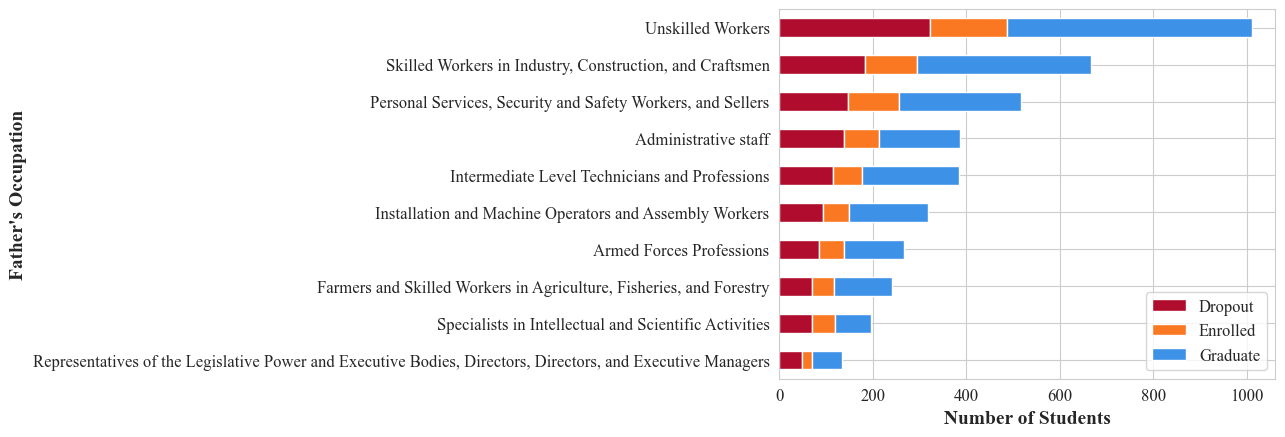

In [174]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 14, weight = 'bold')
font_ticks = FontProperties(family='Times New Roman', size = 12)
legend_title = FontProperties(family='Times New Roman', size = 12, weight = 'bold')

plt.figure(figsize = (15, 6), dpi = 90)

sns.set_style('whitegrid')
student_foccupation = df.groupby(["Father's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Father's occupation", values=0)

foccupation = {count + 1: value for count, value in enumerate(df_father['Occupation Name'].to_list())}
student_foccupation = student_foccupation.rename(index = foccupation)
student_foccupation_total = student_foccupation.sum(axis = 1)
student_foccupation_sorted = student_foccupation_total.sort_values(ascending = True)
student_foccupation_top10 = student_foccupation_sorted[36:]
colors = [(0.69, 0.05, 0.18), (0.98, 0.47, 0.13),  (0.24, 0.57, 0.90)]
student_foccupation.loc[student_foccupation_top10.index].plot(kind='barh', stacked=True, color = colors)

plt.xlabel('Number of Students', font = font_label)
plt.ylabel("Father's Occupation", font = font_label)

plt.xticks(font = font_ticks)
plt.yticks(font = font_ticks)
plt.legend(prop = font_ticks)

plt.savefig('./Figures/father occupation.png', dpi = 300, bbox_inches = 'tight')
plt.show()

<Figure size 1350x540 with 0 Axes>

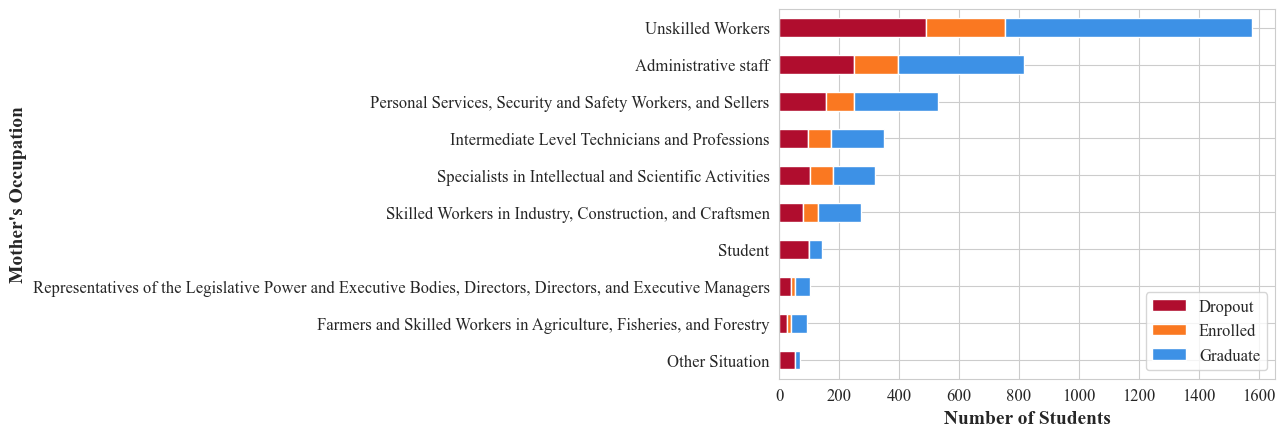

In [176]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 14, weight = 'bold')
font_ticks = FontProperties(family='Times New Roman', size = 12)
legend_title = FontProperties(family='Times New Roman', size = 12, weight = 'bold')

plt.figure(figsize = (15, 6), dpi = 90)

sns.set_style('whitegrid')

student_moccupation = df.groupby(["Mother's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Mother's occupation", values=0)

moccupation = {count + 1: value for count, value in enumerate(df_mother['Occupation Name'].to_list())}
student_moccupation = student_moccupation.rename(index = moccupation)
student_moccupation_total = student_moccupation.sum(axis = 1)
student_moccupation_sorted = student_moccupation_total.sort_values(ascending = True)
student_moccupation_top10 = student_moccupation_sorted[22:]
colors = [(0.69, 0.05, 0.18), (0.98, 0.47, 0.13),  (0.24, 0.57, 0.90)]
student_moccupation.loc[student_moccupation_top10.index].plot(kind='barh', stacked=True, color = colors)

plt.xlabel('Number of Students', font = font_label)
plt.ylabel("Mother's Occupation", font = font_label)
plt.xticks(font = font_ticks)
plt.yticks(font = font_ticks)
plt.legend(prop = font_ticks)

plt.savefig('./Figures/mother occupation.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Hence, highest number of students who graduated and dropped out have parents who are unskilled workers. 

In terms of other socioeconomic status, most students who graduated and dropped do not have special needs. Also, they are non-debtors and their tuition fees are up to date. Yet, these students are non-scholarship holders.

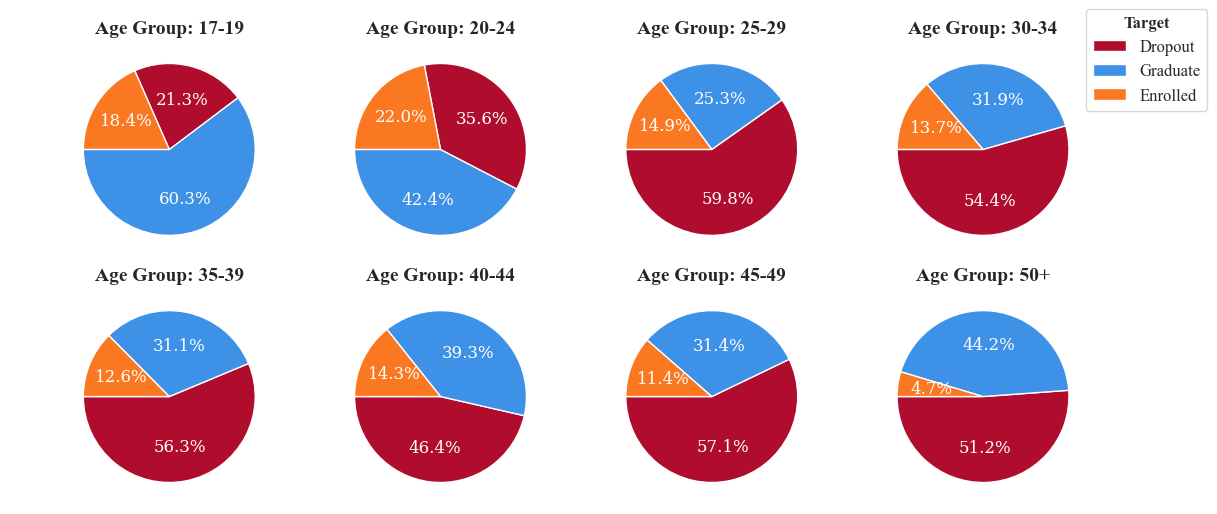

In [197]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 14, weight = 'bold')
font_ticks = FontProperties(family='Times New Roman', size = 12)
legend_title = FontProperties(family='Times New Roman', size = 12, weight = 'bold')


sns.set_style('whitegrid')

bins = [17, 20, 25, 30, 35, 40, 45, 50, float('inf')]
labels = ['17-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50+']

df['age_group'] = pd.cut(df['Age at enrollment'], bins=bins, labels=labels)

fig, axes = plt.subplots(2, 4, figsize=(14, 6))
# fig.suptitle('Distribution of Targets in Different Age Groups', fontsize=15)


target_colors = {'Graduate':(0.24, 0.57, 0.90), 'Dropout': (0.69, 0.05, 0.18), 'Enrolled': (0.98, 0.47, 0.13)}

for idx, age_group in enumerate(labels):
    ax = axes[idx // 4, idx % 4]
    
    data_subset = df[df['age_group'] == age_group]
    target_counts = data_subset['Target'].value_counts()
    
    target_colors_list = [target_colors[target] for target in target_counts.index]
    
    wedges, texts, autotexts = ax.pie(target_counts, labels = target_counts.index, autopct='%1.1f%%', startangle=180, colors=target_colors_list, textprops={'color': 'white', 'font': 'serif', 'size': 12}) 
    ax.set_title(f'Age Group: {age_group}', font = font_label, weight='bold')
    
legend_labels = [f'{label}: {color}' for label, color in zip(['Graduate'], colors)]

legend_labels = ['Dropout', 'Graduate', 'Enrolled']
fig.legend(wedges, legend_labels, loc='center', bbox_to_anchor=(0.92, 0.85), title='Target', frameon = True, title_fontproperties = legend_title, prop = font_xticks)

plt.subplots_adjust(wspace = 0.0, hspace=0.15)
plt.savefig("./Figures/agegroup.png", dpi = 300, bbox_inches = 'tight')
plt.show()


Students that enrolled under 25 and over 50 had much higher graduation rates than other age groups. 

In [198]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

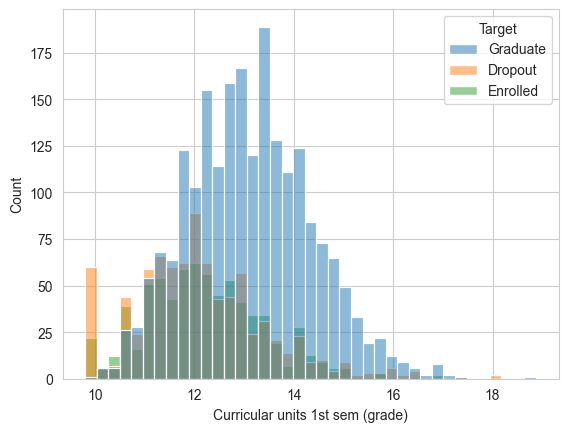

In [199]:
sem_1st_grade = df[df['Curricular units 1st sem (grade)'] > 0]

sns.histplot(data = sem_1st_grade, x = 'Curricular units 1st sem (grade)', hue = 'Target')
plt.show()

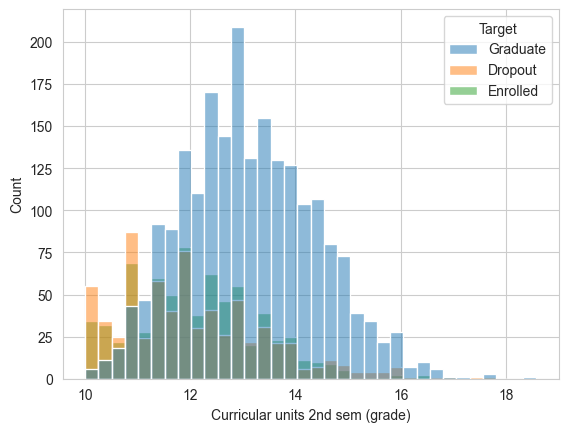

In [200]:
sem_2nd_grade = df[df['Curricular units 2nd sem (grade)'] > 0]

sns.histplot(data = sem_2nd_grade, x = 'Curricular units 2nd sem (grade)', hue = 'Target')
plt.show()

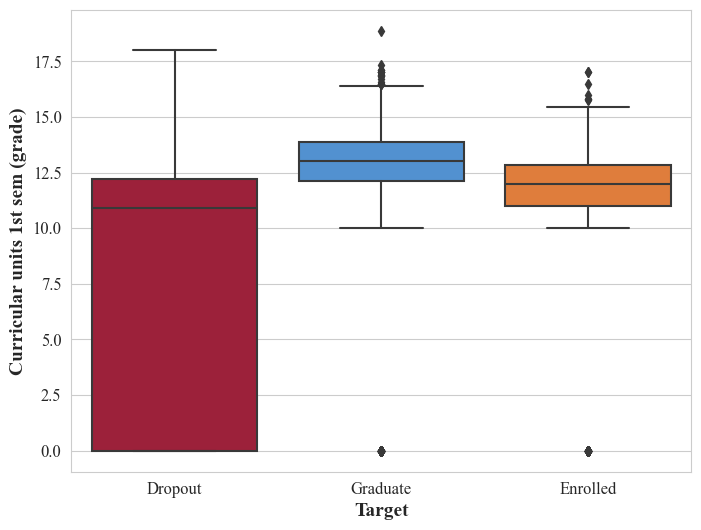

In [259]:
colors = [(0.69, 0.05, 0.18),   (0.24, 0.57, 0.90), (0.98, 0.47, 0.13)]

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Target', y = 'Curricular units 1st sem (grade)', data = df, palette = colors)


plt.xlabel("Target",font = font_label)
plt.ylabel("Curricular units 1st sem (grade)", font = font_label)
plt.xticks(font = font_ticks)
plt.yticks(font = font_ticks)

plt.savefig('./Figures/1st sem grade.png', dpi = 300, bbox_inches = 'tight')
plt.show()

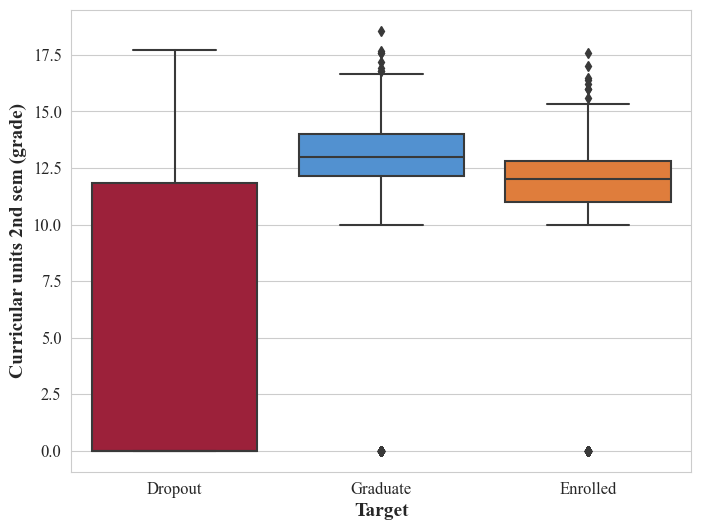

In [258]:
colors = [(0.69, 0.05, 0.18),   (0.24, 0.57, 0.90), (0.98, 0.47, 0.13),]
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Target', y = 'Curricular units 2nd sem (grade)', data = df, palette = colors)

plt.xlabel("Target",font = font_label)
plt.ylabel("Curricular units 2nd sem (grade)", font = font_label)
plt.xticks(font = font_ticks)
plt.yticks(font = font_ticks)
plt.savefig('./Figures/2nd sem grade.png', dpi = 300, bbox_inches = 'tight')
plt.show()

IMPLICATION: There're outliers for graduates and enrolled; implying both graduates & enrolled students seems to outperform (i.e., score higher grades) the upper quartile (75th percentile) marks; Also there is a single observation for graduates who has underperformed.

Graduates as well as enrolled bears a minimum curricular grade of 10.0 units. Dropouts minimum curricular grade is 0 units

### Feature Selection

In [219]:
df_copy = df.copy()
df_copy['Target'] = df_copy['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})

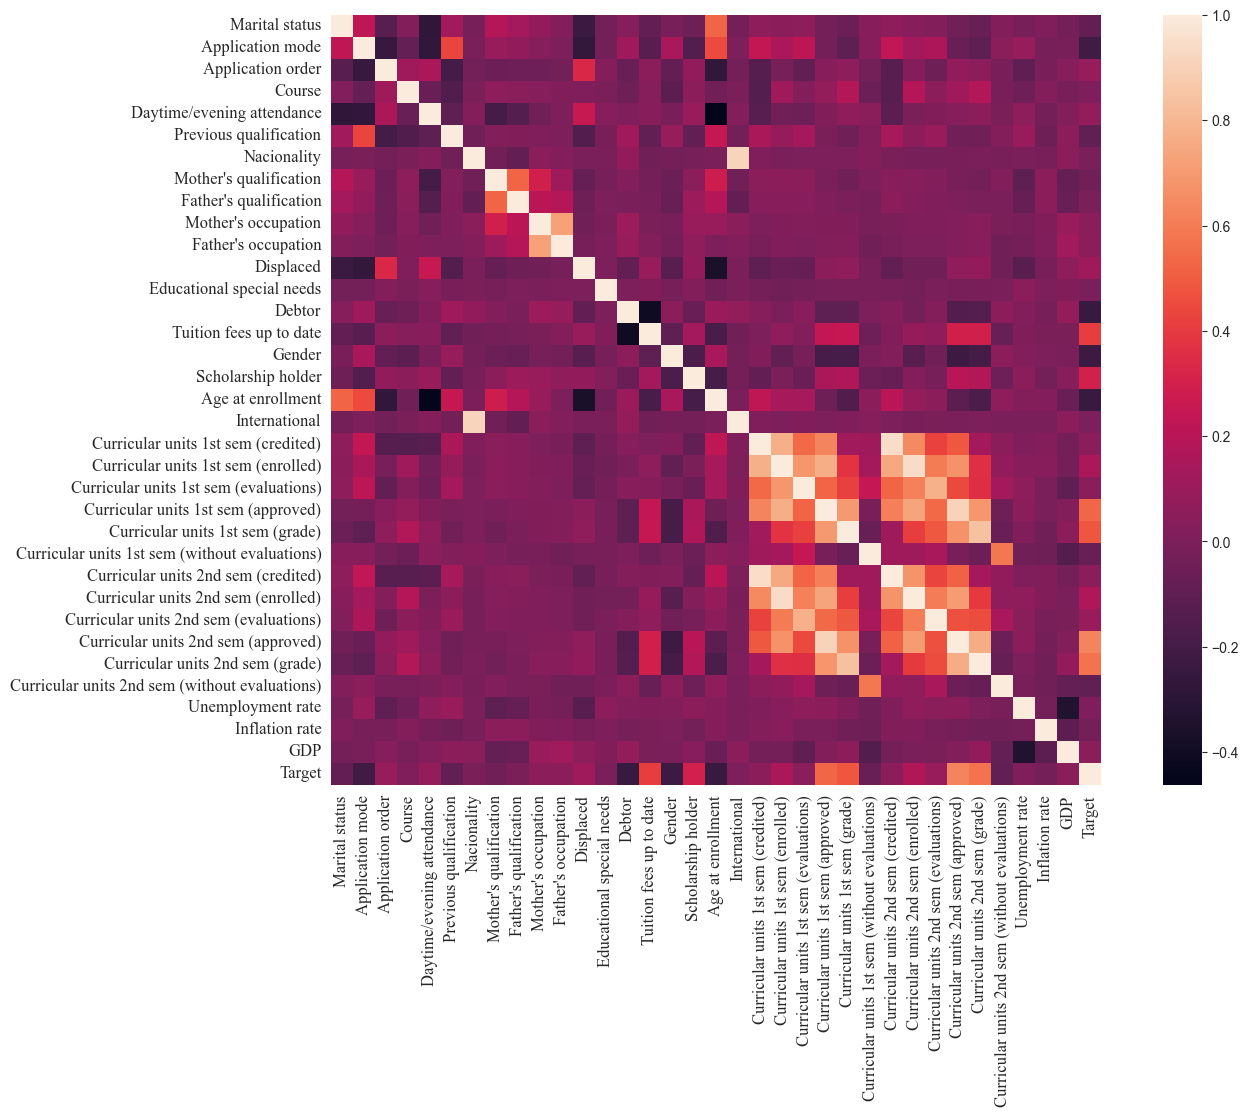

In [222]:
fix,ax=plt.subplots(1, 1, figsize=(16, 10))
sns.heatmap(df_copy.drop('age_group', axis = 1).corr(), annot = False, ax = ax, fmt = '0.1', square = True)
plt.xticks(font = font_ticks)
plt.yticks(font = font_ticks)
plt.savefig('./Figures/correlation heatmap.png', dpi = 300, bbox_inches = 'tight')
plt.show()

This type of Pearson's correlation heatmap doesn't make any sense in this context, because most of the feature values are categorical type, so the intuition about how positive, negative and zero correlation stoods doesn't fit in this map.

Apparently, correlation between features are low except for Nationality and International. Hence, we can either of the feature.

In [223]:
# VarianceThreshold is used for removing features with low variance, which means features with very little variability in their values
# Variance based feature selection on the dataframe df_copy
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.0)
var_thr.fit(df_copy.drop('age_group', axis = 1))
var_thr.get_support()

df_copy.drop('age_group', axis = 1).columns[var_thr.get_support()]

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

## Mutual Info Classifier

#### Mutual Information Score
Mutual Information (MI) is a concept from information theory that quantifies the amount of information shared between two random variables. It measures the dependency or relationship between the variables. <br>
The theory behind Mutual Information is based on the concept of entropy, which is a measure of uncertainty or randomness in a random variable. Entropy is defined as: <br>
H(X) = - Σ P(x) * log(P(x))

Where:

- H(X) is the entropy of the random variable X.
- P(x) is the probability of the value x occurring in the random variable X.
- The summation is taken over all possible values of X.

Mutual Information between two random variables X and Y is defined as the reduction in uncertainty about one variable due to the knowledge of the other variable. It measures the amount of information one variable provides about the other.

MI(X, Y) = H(X) - H(X|Y)

Where:

- MI(X, Y) is the Mutual Information between variables X and Y.
- H(X) is the entropy of X (the uncertainty of X without any knowledge of Y).
- H(X|Y) is the conditional entropy of X given Y (the uncertainty of X when Y is known).

The Mutual Information is non-negative, and it is equal to zero when the two variables are independent (i.e., knowing one variable does not provide any information about the other). As the dependency between the variables increases, the Mutual Information value increases.

In the context of feature selection, Mutual Information can be used to measure the relationship between each feature and the target variable. A high Mutual Information score between a feature and the target indicates that the feature is highly informative for predicting the target variable. Thus, features with high Mutual Information scores are considered important and may be selected for further analysis or modeling.

In [224]:
X_train,X_test,y_train,y_test=train_test_split(df_copy.drop(labels = ['Target', 'age_group'], axis=1), df_copy['Target'], test_size = 0.2, random_state=0)

In [225]:
y_train.describe()

count    3539.000000
mean        1.175756
std         0.887492
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Target, dtype: float64

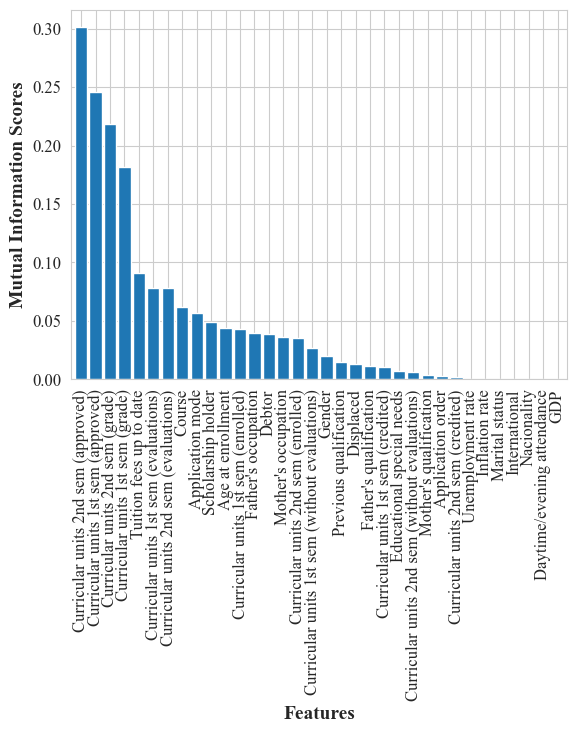

In [232]:
mf = mutual_info_classif(X_train, y_train)
mf = pd.Series(mf)
mf.index = X_train.columns
mf.sort_values(ascending=False).plot(kind = 'bar', width = 0.85)
plt.xlabel('Features', font = font_label)
plt.ylabel('Mutual Information Scores', font = font_label)
plt.xticks(font = font_ticks)
plt.yticks(font = font_ticks)

plt.savefig('./Figures/mutual information scores.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [227]:
top_col=SelectKBest(mutual_info_classif, k = 5)
top_col.fit(X_train,y_train)
X_train.columns[top_col.get_support()]

Index(['Tuition fees up to date', 'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')

#### Chi-Square Test
Chi2 test is used to evaluate non-negative and categorical variable.<br>
The chi-squared test is a statistical test used to determine if there is a significant association between two categorical variables. It can be employed to evaluate the independence of a categorical feature with respect to the target variable. Features with high chi-squared values are likely to be more informative and can be selected for modeling.

It returns two values: 
- F score: Higher values are better.
- P_value: Lower values are better.

In [239]:
numeric_columns = X_train.select_dtypes(include='number')

non_negative_columns = numeric_columns.columns[numeric_columns.min() >= 0]

print("Negative Columns", set(df_copy.columns.to_list()).difference(set(non_negative_columns.to_list())))

Negative Columns {'age_group', 'Inflation rate', 'Target', 'GDP'}


In [240]:
X_train_chi2 = X_train[non_negative_columns.to_list()]
f_score_p = chi2(X_train_chi2, y_train)

p_values = pd.Series(f_score_p[1])
p_values.index = X_train_chi2.columns
p_values.sort_values()

Curricular units 1st sem (approved)                0.000000e+00
Curricular units 2nd sem (grade)                   0.000000e+00
Curricular units 2nd sem (approved)                0.000000e+00
Curricular units 1st sem (grade)                   0.000000e+00
Application mode                                  1.641678e-133
Age at enrollment                                 2.745993e-124
Scholarship holder                                 1.754411e-53
Curricular units 2nd sem (evaluations)             1.127491e-48
Debtor                                             3.274329e-41
Previous qualification                             1.176855e-40
Curricular units 2nd sem (without evaluations)     2.745686e-33
Gender                                             3.969497e-28
Curricular units 2nd sem (credited)                7.791077e-27
Mother's qualification                             1.113736e-26
Curricular units 1st sem (credited)                2.725338e-24
Father's occupation                     

In [241]:
top_col=SelectKBest(chi2, k = 5)
top_col.fit(X_train_chi2, y_train)
X_train_chi2.columns[top_col.get_support()]

Index(['Application mode', 'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')

#### Difference between Mutual Information score and Chi-Square Test
- Chi-square test determines if there is a significant association between two categorical variables, whereas Mutual Information measure the amount of information shared betwen two random variables. 
- Chi-square test is typically used when you have a categorical feature and a categorical target variable, whereas MI is used regardless of whether the variables are continuous or categorical. 
- In the context of feature selection, higher mutual information scores indicate that the feature is more informative and relevant for predicting the target. On the other hand, Chi-square test returns a p-value for each feature, whose lower value indicate that the feature is more likely to be associated with the target. 
- Chi-square test is more focused on the independence of categorical variables and may not capture more complex relationships between variables. Whereas, mutual information score is more focused on quantifying the information gain between variables, and it can capture both linear and non-linear relationships.

## Data Modeling

#### First, data modeling is observed with Naive Bayes Classifier and other Greater algorithms like logistic regression

Since we are predicting whether a student will dropout or not so, the number of 'Enrolled' student is irrelevant. We only need to know whether a student graduated or dropout. So, we are dropping the 'Enrolled' values and going forward with 'Graduate' & 'Dropout' values. 

In [242]:
df_data_modeling = df.copy()
df_data_modeling['Target'] = df_data_modeling['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})
df_data_modeling.drop(df_data_modeling[df_data_modeling['Target'] == 1].index, inplace = True)
df_data_modeling.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,age_group
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2,17-19
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,0,17-19
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0,25-29
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,17-19
4423,1,5,1,15,1,1,9,23,27,6,10,1,0,0,1,0,0,22,1,0,6,8,6,11.666667,0,0,6,6,6,13.000000,0,12.7,3.7,-1.70,2,20-24


In [243]:
df_data_modeling['Dropout'] = df_data_modeling['Target'].apply(lambda x: 1 if x == 0 else 0)
df_data_modeling.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,age_group,Dropout
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0,17-19,1
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2,17-19,0
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0,17-19,1
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,17-19,0
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2,40-44,0


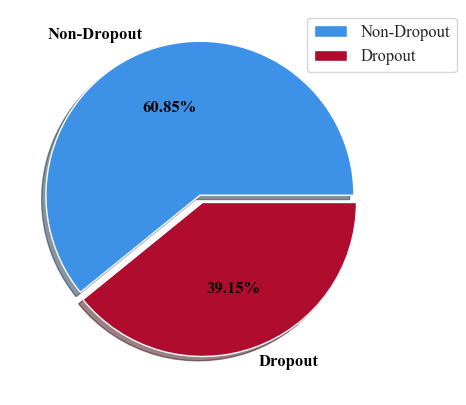

In [276]:
plt.figure(figsize=(5, 5))
colors = [(0.24, 0.57, 0.90), (0.69, 0.05, 0.18)]
plt.pie(df_data_modeling['Dropout'].value_counts(), labels = ['Non-Dropout', 'Dropout'], explode = (0.05, 0.0), autopct='%1.2f%%', shadow = True, textprops = {'family':'Times New Roman', 'size': 12, 'weight': 'bold', 'color':'black'}, colors = colors)
plt.legend(bbox_to_anchor=(0.75, 1.0), prop = font_ticks)
plt.savefig('./Figures/dropout and non dropouts.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Standard Scaling

In [358]:
X = df_data_modeling.iloc[:, :34].values
X = StandardScaler().fit_transform(X)
y = df_data_modeling['Dropout'].values

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [360]:
def perform(y_pred):
    sns.set_style('white')
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

def verbose_result(y_pred, y_truth):
    print("Precision : ", precision_score(y_truth, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_truth, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_truth, y_pred))
    print("F1 Score : ", f1_score(y_truth, y_pred, average = 'micro'))

### Gaussian Naive Bayes

#### Without StandardScaling and without Cross Validation

In [361]:
X = df_data_modeling.iloc[:, :34].values
y = df_data_modeling['Dropout'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

model_nb_1 = GaussianNB()
model_nb_1.fit(X_train, y_train)

y_pred_nb = model_nb_1.predict(X_test)

verbose_result(y_pred_nb, y_test)

Precision :  0.8539944903581267
Recall :  0.8539944903581267
Accuracy :  0.8539944903581267
F1 Score :  0.8539944903581267


#### With StandardScaling and without Cross Validation

In [362]:
X = df_data_modeling.iloc[:, :34].values
train_scaler = StandardScaler()
X = train_scaler.fit_transform(X)
y = df_data_modeling['Dropout'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

model_nb_2 = GaussianNB()
model_nb_2.fit(X_train, y_train)

y_pred_nb = model_nb_2.predict(X_test)

verbose_result(y_pred_nb, y_test)

Precision :  0.8539944903581267
Recall :  0.8539944903581267
Accuracy :  0.8539944903581267
F1 Score :  0.8539944903581267


#### With MinMaxScaler and Without Cross-Validation

In [363]:
X = df_data_modeling.iloc[:, :34].values
X = MinMaxScaler().fit_transform(X)
X = RobustScaler().fit_transform(X)
y = df_data_modeling['Dropout'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

model_nb_3 = GaussianNB()
model_nb_3.fit(X_train, y_train)

y_pred_nb = model_nb_3.predict(X_test)

verbose_result(y_pred_nb, y_test)

Precision :  0.8539944903581267
Recall :  0.8539944903581267
Accuracy :  0.8539944903581267
F1 Score :  0.8539944903581267


Since, our feature contains categorical objects and continuous, on analysis their range aren't drastically different to affect other with their dominant values, so using anytype of scaling like standardization (z-score) or normalization (min-max) doesn't have any affect on its accuracy or any other metrics. 

### [TO INCLUDE] With Cross Validation

In [323]:
X = df_data_modeling.iloc[:, :34].values
y = df_data_modeling['Dropout'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

model_nb_4 = GaussianNB()
model_nb_4.fit(X_train, y_train)

y_pred_nb = model_nb_4.predict(X_test)
scores = cross_val_score(model_nb_4, X_train, y_train, scoring = 'accuracy', cv = 44)
verbose_result(y_pred_nb, y_test)
print("With Scaling and With Cross-Validation: ", scores.mean())

Precision :  0.8581267217630854
Recall :  0.8581267217630854
Accuracy :  0.8581267217630854
F1 Score :  0.8581267217630854
With Scaling and With Cross-Validation:  0.8436639118457303


In [284]:
scores_list = []
for i in tqdm(range(2, 50), ncols = 100):
    scores_list.append(cross_val_score(model_nb_4, X_train, y_train, scoring = 'accuracy', cv = i).mean())

print(f"Maximum scores is {np.max(np.array(scores_list))} at {np.argmax(np.array(scores_list)) + 2} cv value")

100%|███████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.26it/s]

Maximum scores is 0.8436639118457303 at 44 cv value


In [441]:
def build_classification_rep(y_pred, y_true):
    classification_rep = classification_report(y_true = y_true, y_pred = y_pred, output_dict=True)
    data = []
    accuracy_value = None
    for key, value in classification_rep.items():
        if key == 'accuracy':
            accuracy_value = "{:.2f}".format(value * 100)
        if not isinstance(value, float):
            row = [key] + [value[label] for label in value.keys()]
            data.append(row)

    columns = ['class', 'precision', 'recall', 'f1-score', 'support']
    df = pd.DataFrame(data, columns=columns)
    df['precision'] = df['precision'].apply(lambda x: "{:.2f}".format(x * 100))
    df['recall'] = df['recall'].apply(lambda x: "{:.2f}".format(x * 100))
    df['f1-score'] = df['f1-score'].apply(lambda x: "{:.2f}".format(x * 100))
    
    class_labels = {'0' : 'Non-Dropout', '1' : 'Dropout', 'macro avg' : 'Macro Avg.', 'weighted avg': 'Weighted Avg.'}
    df['class'] = df['class'].replace(class_labels)
    
    rows = 4
    cols = 5
    array_2d = [[0 for j in range(cols)] for i in range(rows)]
    
    for i, row in enumerate(df.iterrows()):
        array_2d[i][0] = row[1]['class']
        array_2d[i][1] = row[1]['precision']
        array_2d[i][2] = row[1]['recall']
        array_2d[i][3] = row[1]['f1-score']
        array_2d[i][4] = row[1]['support']
    
    output_latex = r'''\begin{table}[ht]
  \centering
  \caption{Classification Report: Logistic Regression Model}
  \label{tab:6}
  \begin{tabular}{|c|c|c|c|c|c|}
    \hline
    \rule{0pt}{10pt}
    \textbf{Class} & \textbf{Precision} & \textbf{Recall} & \textbf{F1-Score} & \textbf{Support} \\
    \hline
    \rule{0pt}{10pt}''' + f'''
     f{array_2d[0][0]} & f{array_2d[0][1]}\% & f{array_2d[0][2]}\% & f{array_2d[0][3]}\% & f{array_2d[0][4]} \\
     f{array_2d[1][0]} & f{array_2d[1][1]}\% & f{array_2d[1][2]}\% & f{array_2d[1][3]}\% & f{array_2d[1][4]} \\
    \hline''' + '''
    \rule{0pt}{10pt}
    ''' + f'''
     Accuracy & & & {accuracy_value}\% & {array_2d[3][4]} \\
     f{array_2d[2][0]} & f{array_2d[2][1]}\% & f{array_2d[2][2]}\% & f{array_2d[2][3]}\% & f{array_2d[2][4]} \\
     f{array_2d[3][0]} & f{array_2d[3][1]}\% & f{array_2d[3][2]}\% & f{array_2d[3][3]}\% & f{array_2d[3][4]} \\
    ''' + '''
    \hline    
  \end{tabular}
  \vspace{10pt}
\end{table}'''
    
    latex_string = output_latex.replace('\\n', '\n')
    latex_string = latex_string.replace('\\\\', '\\')
    latex_string = latex_string.replace('f', '', 2)
    latex_string = latex_string.replace('f', '', 3)
    
    return latex_string

In [442]:
build_classification_rep(y_pred_nb, y_test)

'\\begin{table}[ht]\n  \\centering\n  \\caption{Classiication Report: Logistic Regression Model}\n  \\label{tab:6}\n  \\begin{tabular}{|c|c|c|c|c|c|}\n    \\hline\n    \\rule{0pt}{10pt}\n    \\textb{Class} & \\textb{Precision} & \\textb{Recall} & \\textb{F1-Score} & \\textbf{Support} \\\n    \\hline\n    \\rule{0pt}{10pt}\n     fNon-Dropout & f86.23\\% & f90.85\\% & f88.48\\% & f448.0 \\\n     fDropout & f83.86\\% & f76.62\\% & f80.08\\% & f278.0 \\\n    \\hline\n    \rule{0pt}{10pt}\n    \n     Accuracy & & & 85.40\\% & 726.0 \\\n     fMacro Avg. & f85.04\\% & f83.73\\% & f84.28\\% & f726.0 \\\n     fWeighted Avg. & f85.32\\% & f85.40\\% & f85.26\\% & f726.0 \\\n    \n    \\hline    \n  \\end{tabular}\n  \x0bspace{10pt}\n\\end{table}'

### [TO INCLUDE] Without StandardScaling and CV, with MultinomialNB()

In [443]:
X = df_data_modeling.iloc[:, :34]
X.drop(['Inflation rate', 'GDP'], axis = 1, inplace = True)

X = X.values
y = df_data_modeling['Dropout'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

model_MNB_1 = MultinomialNB()
model_MNB_1.fit(X_train, y_train)

y_pred_nb = model_MNB_1.predict(X_test)
verbose_result(y_pred_nb, y_test)
scores = cross_val_score(model_MNB_1, X_train, y_train, cv = 2)
print("With Scaling and With Cross-Validation: ", scores.mean())

Precision :  0.8305785123966942
Recall :  0.8305785123966942
Accuracy :  0.8305785123966942
F1 Score :  0.8305785123966943
With Scaling and With Cross-Validation:  0.8164600550964187


In [444]:
scores_list = []
for i in tqdm(range(2, 50), ncols = 100):
    scores_list.append(cross_val_score(model_MNB_1, X_train, y_train, scoring = 'accuracy', cv = i).mean())

print(f"Maximum scores is {np.max(np.array(scores_list))} at {np.argmax(np.array(scores_list)) + 2} cv value")

100%|███████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 15.58it/s]

Maximum scores is 0.8164600550964187 at 2 cv value


In [445]:
build_classification_rep(y_pred_nb, y_test)

'\\begin{table}[ht]\n  \\centering\n  \\caption{Classiication Report: Logistic Regression Model}\n  \\label{tab:6}\n  \\begin{tabular}{|c|c|c|c|c|c|}\n    \\hline\n    \\rule{0pt}{10pt}\n    \\textb{Class} & \\textb{Precision} & \\textb{Recall} & \\textb{F1-Score} & \\textbf{Support} \\\n    \\hline\n    \\rule{0pt}{10pt}\n     fNon-Dropout & f81.39\\% & f92.56\\% & f86.62\\% & f430.0 \\\n     fDropout & f86.50\\% & f69.26\\% & f76.92\\% & f296.0 \\\n    \\hline\n    \rule{0pt}{10pt}\n    \n     Accuracy & & & 83.06\\% & 726.0 \\\n     fMacro Avg. & f83.94\\% & f80.91\\% & f81.77\\% & f726.0 \\\n     fWeighted Avg. & f83.47\\% & f83.06\\% & f82.66\\% & f726.0 \\\n    \n    \\hline    \n  \\end{tabular}\n  \x0bspace{10pt}\n\\end{table}'

#### With MinMaxScaler(), Cross-Validation with MultinomialNB()

In [326]:
X = df_data_modeling.iloc[:, :34]
X.drop(['Inflation rate', 'GDP'], axis = 1, inplace = True)
X = MinMaxScaler().fit_transform(X)

y = df_data_modeling['Dropout'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

model_MNB_2 = MultinomialNB()
model_MNB_2.fit(X_train, y_train)

y_pred_nb = model_MNB_2.predict(X_test)
verbose_result(y_pred_nb, y_test)
scores = cross_val_score(model_MNB_2, X_train, y_train, cv = 6)
print("With Scaling and With Cross-Validation: ", scores.mean())

Precision :  0.8071625344352618
Recall :  0.8071625344352618
Accuracy :  0.8071625344352618
F1 Score :  0.8071625344352618
With Scaling and With Cross-Validation:  0.8040633608815427


In [291]:
scores_list = []
for i in tqdm(range(2, 50), ncols = 100):
    scores_list.append(cross_val_score(model_MNB_2, X_train, y_train, scoring = 'accuracy', cv = i).mean())

print(f"Maximum scores is {np.max(np.array(scores_list))} at {np.argmax(np.array(scores_list)) + 2} cv value")

100%|███████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 17.70it/s]

Maximum scores is 0.8040633608815427 at 6 cv value


An interesting case, why is there decrease in accuracy when using MinMaxScaler() for MultiNomialNB() and the Cross-validation also increases the accuracy further, but in the case of GaussianNB(), there was not affect of using any kind of scalar. Why ?

#### Without StandardScaling and CV, with BernoulliNB()

In [327]:
X = df_data_modeling.iloc[:, :34].values
y = df_data_modeling['Dropout'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

model_BNB_1 = BernoulliNB()
model_BNB_1.fit(X_train, y_train)

y_pred_nb = model_BNB_1.predict(X_test)
verbose_result(y_pred_nb, y_test)
scores = cross_val_score(model_BNB_1, X_train, y_train, cv = 6)
print("With Scaling and With Cross-Validation: ", scores.mean())

Precision :  0.8429752066115702
Recall :  0.8429752066115702
Accuracy :  0.8429752066115702
F1 Score :  0.8429752066115702
With Scaling and With Cross-Validation:  0.8391873278236915


In [293]:
scores_list = []
for i in tqdm(range(2, 50), ncols = 100):
    scores_list.append(cross_val_score(model_BNB_1, X_train, y_train, scoring = 'accuracy', cv = i).mean())

print(f"Maximum scores is {np.max(np.array(scores_list))} at {np.argmax(np.array(scores_list)) + 2} cv value")

100%|███████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.87it/s]

Maximum scores is 0.8391873278236915 at 6 cv value


### [TO INCLUDE] With StandardScaling, Cross-Validation and BernoulliNB()

In [446]:
X = df_data_modeling.iloc[:, :34].values
X = StandardScaler().fit_transform(X)
# X = MinMaxScaler().fit_transform(X)
y = df_data_modeling['Dropout'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

model_BNB_2 = BernoulliNB()
model_BNB_2.fit(X_train, y_train)

y_pred_nb = model_BNB_2.predict(X_test)
verbose_result(y_pred_nb, y_test)
scores = cross_val_score(model_BNB_2, X_train, y_train, cv = 13)
print("With Scaling and With Cross-Validation: ", scores.mean())

Precision :  0.8829201101928374
Recall :  0.8829201101928374
Accuracy :  0.8829201101928374
F1 Score :  0.8829201101928374
With Scaling and With Cross-Validation:  0.8732875868526092


In [447]:
scores_list = []
for i in tqdm(range(2, 50), ncols = 100):
    scores_list.append(cross_val_score(model_BNB_2, X_train, y_train, scoring = 'accuracy', cv = i).mean())

print(f"Maximum scores is {np.max(np.array(scores_list))} at {np.argmax(np.array(scores_list)) + 2} cv value")

100%|███████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.18it/s]

Maximum scores is 0.8732875868526092 at 13 cv value


In [448]:
build_classification_rep(y_pred_nb, y_test)

'\\begin{table}[ht]\n  \\centering\n  \\caption{Classiication Report: Logistic Regression Model}\n  \\label{tab:6}\n  \\begin{tabular}{|c|c|c|c|c|c|}\n    \\hline\n    \\rule{0pt}{10pt}\n    \\textb{Class} & \\textb{Precision} & \\textb{Recall} & \\textb{F1-Score} & \\textbf{Support} \\\n    \\hline\n    \\rule{0pt}{10pt}\n     fNon-Dropout & f88.25\\% & f92.56\\% & f90.35\\% & f430.0 \\\n     fDropout & f88.36\\% & f82.09\\% & f85.11\\% & f296.0 \\\n    \\hline\n    \rule{0pt}{10pt}\n    \n     Accuracy & & & 88.29\\% & 726.0 \\\n     fMacro Avg. & f88.31\\% & f87.33\\% & f87.73\\% & f726.0 \\\n     fWeighted Avg. & f88.30\\% & f88.29\\% & f88.22\\% & f726.0 \\\n    \n    \\hline    \n  \\end{tabular}\n  \x0bspace{10pt}\n\\end{table}'

Question: Why in the case of BernoulliNB() the normal accuracy is just 51% but it increased to 87% while using StandardScaler()?

But using MinMaxScaler(), the normal accuracy is 83.05%, whereas after CV applied, we get 83.608% accuracy. 
So, why is this kind of nature? 

### [TO INCLUDE] Without StandardScaling and without CV, with CategoricalNB()

In [449]:
categorical_df = df_data_modeling.copy()
categorical_df['Curricular units 1st sem (grade)'] = pd.cut(categorical_df['Curricular units 1st sem (grade)'], 6)
categorical_df['Curricular units 2nd sem (grade)'] = pd.cut(categorical_df['Curricular units 2nd sem (grade)'], 6)
categorical_df['Unemployment rate'] = pd.cut(categorical_df['Unemployment rate'], 6)

age_group = categorical_df['age_group']
categorical_df = categorical_df.drop('age_group', axis = 1)
categorical_df['Age at enrollment'] = age_group
categorical_df.drop(['Inflation rate', 'GDP', 'Target'], axis = 1, inplace = True)

categorical_df['Age at enrollment'] = categorical_df['Age at enrollment'].fillna('17-19')

categorical_columns = ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Age at enrollment']
ord_encoder = OrdinalEncoder()
categorical_df[categorical_columns] = ord_encoder.fit_transform(categorical_df[categorical_columns])

In [450]:
X = categorical_df.iloc[:, :-1].values
# X = MinMaxScaler().fit_transform(X)
y = categorical_df['Dropout'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

model_CNB = CategoricalNB()
model_CNB.fit(X_train, y_train)

y_pred_nb = model_CNB.predict(X_test[0:595])
verbose_result(y_pred_nb, y_test[:595])

Precision :  0.865546218487395
Recall :  0.865546218487395
Accuracy :  0.865546218487395
F1 Score :  0.865546218487395


In [452]:
build_classification_rep(y_pred_nb, y_test[:595])

'\\begin{table}[ht]\n  \\centering\n  \\caption{Classiication Report: Logistic Regression Model}\n  \\label{tab:6}\n  \\begin{tabular}{|c|c|c|c|c|c|}\n    \\hline\n    \\rule{0pt}{10pt}\n    \\textb{Class} & \\textb{Precision} & \\textb{Recall} & \\textb{F1-Score} & \\textbf{Support} \\\n    \\hline\n    \\rule{0pt}{10pt}\n     fNon-Dropout & f87.61\\% & f89.63\\% & f88.60\\% & f347.0 \\\n     fDropout & f85.00\\% & f82.26\\% & f83.61\\% & f248.0 \\\n    \\hline\n    \rule{0pt}{10pt}\n    \n     Accuracy & & & 86.55\\% & 595.0 \\\n     fMacro Avg. & f86.30\\% & f85.94\\% & f86.11\\% & f595.0 \\\n     fWeighted Avg. & f86.52\\% & f86.55\\% & f86.52\\% & f595.0 \\\n    \n    \\hline    \n  \\end{tabular}\n  \x0bspace{10pt}\n\\end{table}'

On using MinMaxScaler(), the accuracy drastically decreased to 72.268%, whereas without any scaler, the accuracy retained at 86.554%

## Logistic Regression

In [453]:
X = df_data_modeling.iloc[:, :34].values
y = df_data_modeling['Dropout'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
verbose_result(y_pred_lr, y_test)
scores = cross_val_score(model_lr, X_train, y_train, scoring = 'accuracy', cv = 14)
print(scores.mean())

Precision :  0.9146005509641874
Recall :  0.9146005509641874
Accuracy :  0.9146005509641874
F1 Score :  0.9146005509641874
0.9132359186707015


In [454]:
scores_list = []
for i in tqdm(range(2, 20), ncols = 100):
    scores_list.append(cross_val_score(model_lr, X_train, y_train, scoring = 'accuracy', cv = i).mean())

print(f"Maximum scores is {np.max(np.array(scores_list))} at {np.argmax(np.array(scores_list)) + 2} cv value")

100%|███████████████████████████████████████████████████████████████| 18/18 [00:29<00:00,  1.64s/it]

Maximum scores is 0.9132359186707015 at 14 cv value


In [455]:
build_classification_rep(y_pred_lr, y_test)

'\\begin{table}[ht]\n  \\centering\n  \\caption{Classiication Report: Logistic Regression Model}\n  \\label{tab:6}\n  \\begin{tabular}{|c|c|c|c|c|c|}\n    \\hline\n    \\rule{0pt}{10pt}\n    \\textb{Class} & \\textb{Precision} & \\textb{Recall} & \\textb{F1-Score} & \\textbf{Support} \\\n    \\hline\n    \\rule{0pt}{10pt}\n     fNon-Dropout & f90.53\\% & f95.58\\% & f92.99\\% & f430.0 \\\n     fDropout & f93.01\\% & f85.47\\% & f89.08\\% & f296.0 \\\n    \\hline\n    \rule{0pt}{10pt}\n    \n     Accuracy & & & 91.46\\% & 726.0 \\\n     fMacro Avg. & f91.77\\% & f90.53\\% & f91.04\\% & f726.0 \\\n     fWeighted Avg. & f91.54\\% & f91.46\\% & f91.40\\% & f726.0 \\\n    \n    \\hline    \n  \\end{tabular}\n  \x0bspace{10pt}\n\\end{table}'

### Hybrid Naive Bayes

In [457]:
continuous_columns = ['Course', "Mother's occupation", "Father's occupation", 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']

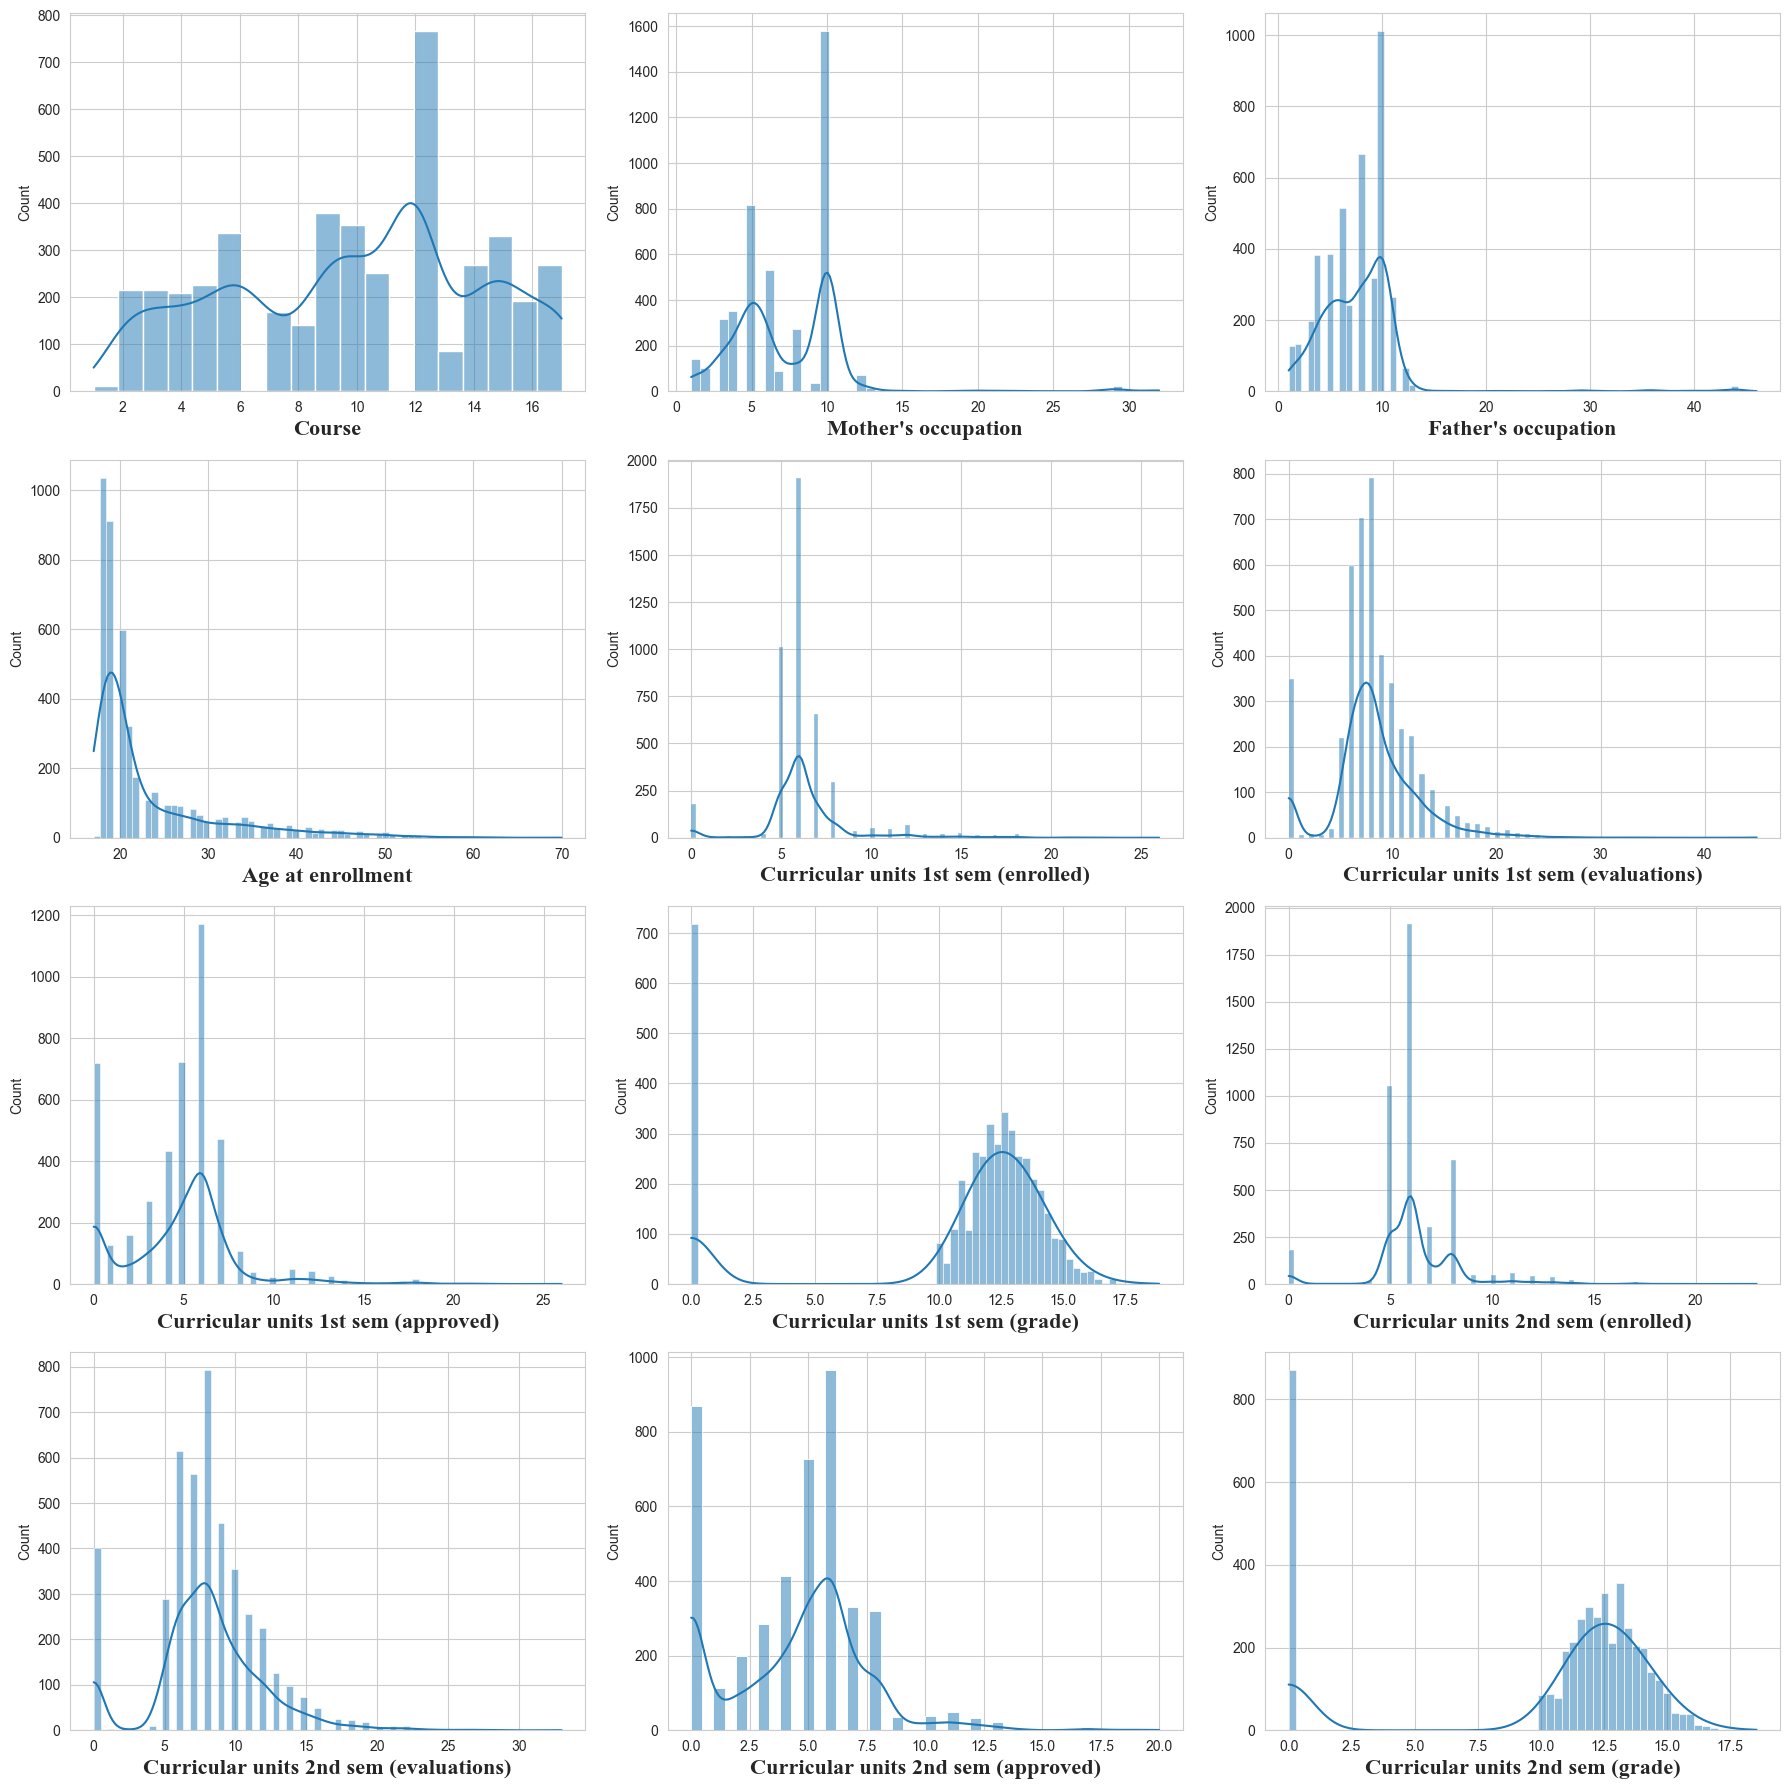

In [458]:
font_xlabel = FontProperties(family='Times New Roman', size = 16, weight = 'bold')
num_rows = (len(continuous_columns) + 2) // 3  # Limit to 4 columns per row
num_cols = min(len(continuous_columns), 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize = (18, 18))
for i, column in enumerate(continuous_columns):
    sns.histplot(data = df, x = column, kde = True, ax = axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_xlabel(column, font = font_xlabel)
    
# Remove the empty subplots (axes)
if len(continuous_columns) < (num_rows * num_cols):
    for i in range(len(continuous_columns), num_rows * num_cols):
        plt.delaxes(axes.flatten()[i])
        
plt.subplots_adjust(wspace = 0.5, hspace = 0.9)
plt.tight_layout()
plt.savefig('./Figures/feature distribution.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [459]:
continuous_columns = ['Course', "Mother's occupation", "Father's occupation", 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Unemployment rate']

categorical_columns = ['Marital status', 'Application mode', 'Application order', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)']

# Turn off the SettingWithCopyWarning globally
pd.options.mode.chained_assignment = None

hybrid_data = df.copy()
hybrid_data['Target'] = hybrid_data['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})
hybrid_data.drop(hybrid_data[hybrid_data['Target'] == 1].index, inplace = True)
hybrid_data['Dropout'] = hybrid_data['Target'].apply(lambda x : 1 if x == 0 else 0)

In [460]:
hybrid_data.drop([1618, 4420, 3578], axis = 0, inplace = True)
hybrid_data.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,age_group,Dropout
4418,1,15,1,5,1,14,1,3,28,4,10,0,0,0,1,1,0,20,0,2,7,7,6,12.500000,0,5,9,10,7,13.142857,1,16.2,0.3,-0.92,2,17-19,0
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2,17-19,0
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0,25-29,1
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,17-19,0
4423,1,5,1,15,1,1,9,23,27,6,10,1,0,0,1,0,0,22,1,0,6,8,6,11.666667,0,0,6,6,6,13.000000,0,12.7,3.7,-1.70,2,20-24,0


In [462]:
X = hybrid_data.drop('Target', axis = 1)
y = hybrid_data['Dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

X_test_ = pd.concat([X_test.iloc[:594], X_test.iloc[596:]], axis = 0)
y_test_ = pd.concat([y_test.iloc[:594], y_test.iloc[596:]], axis = 0)


X_train_gaussian = X_train[continuous_columns]
X_test_gaussian = X_test_[continuous_columns]

X_train_categorical = X_train[categorical_columns]
X_test_categorical = X_test_[categorical_columns]


model_GNB = GaussianNB()
model_GNB.fit(X_train_gaussian, y_train)
y_pred_gaussian = model_GNB.predict(X_test_gaussian)
# verbose_result(y_pred_gaussian, y_test_)

print(build_classification_rep(y_pred_gaussian, y_test_))

model_CNB = CategoricalNB()
model_CNB.fit(X_train_categorical, y_train)
y_pred_categorical = model_CNB.predict(X_test_categorical)
# verbose_result(y_pred_categorical, y_test_)
print(build_classification_rep(y_pred_categorical, y_test_))

count = 0
y_pred_hybrid = []
for pred_cat, pred_gauss in zip(y_pred_categorical, y_pred_gaussian):
    if pred_cat == pred_gauss:
        y_pred_hybrid.append(pred_cat)
    else:
        y_pred_hybrid.append(1)
print("Accuracy of hybrid NB: ", (y_pred_hybrid == y_test_).mean())

\begin{table}[ht]
  \centering
  \caption{Classiication Report: Logistic Regression Model}
  \label{tab:6}
  \begin{tabular}{|c|c|c|c|c|c|}
    \hline
    \rule{0pt}{10pt}
    \textb{Class} & \textb{Precision} & \textb{Recall} & \textb{F1-Score} & \textbf{Support} \
    \hline
    \rule{0pt}{10pt}
     fNon-Dropout & f80.93\% & f94.98\% & f87.39\% & f657.0 \
     fDropout & f89.56\% & f65.81\% & f75.87\% & f430.0 \
    \hline
ule{0pt}{10pt}
    
     Accuracy & & & 83.44\% & 1087.0 \
     fMacro Avg. & f85.25\% & f80.40\% & f81.63\% & f1087.0 \
     fWeighted Avg. & f84.35\% & f83.44\% & f82.84\% & f1087.0 \
    
    \hline    
  \end{tabular}
  space{10pt}
\end{table}
\begin{table}[ht]
  \centering
  \caption{Classiication Report: Logistic Regression Model}
  \label{tab:6}
  \begin{tabular}{|c|c|c|c|c|c|}
    \hline
    \rule{0pt}{10pt}
    \textb{Class} & \textb{Precision} & \textb{Recall} & \textb{F1-Score} & \textbf{Support} \
    \hline
    \rule{0pt}{10pt}
     fNon-Dropout & f7

## Now perform same data modeling, but with less features

In [463]:
df_new_copy = df.copy()
df_new_copy['Target'] = df_new_copy['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})
df_new_copy.drop(df_new_copy[df_new_copy['Target'] == 1].index, inplace = True)

df_new_copy['Dropout'] = df_new_copy['Target'].apply(lambda x: 1 if x == 0 else 0)

features = df_new_copy.drop(['Inflation rate', 'GDP', 'Target', 'age_group', 'Dropout'], axis = 1)
target = df_new_copy['Dropout']

#### GaussianNM() without StandardScaling()

In [464]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 5)

acc_score_list = []
for i in tqdm(range(1, 20), ncols = 100):
    top_col=SelectKBest(mutual_info_classif, k = i)
    top_col.fit(X_train, y_train)
    top_k_features = X_train.columns[top_col.get_support()].to_list()

    k_features_X_train = X_train[top_k_features].values
    k_features_X_test = X_test[top_k_features].values
    k_features_y_train = y_train.values
    k_features_y_test = y_test.values

    model_nb = GaussianNB()
    model_nb.fit(k_features_X_train, k_features_y_train)

    y_pred_nb = model_nb.predict(k_features_X_test)
    acc_score_list.append((i, accuracy_score(y_pred_nb, k_features_y_test)))

100%|███████████████████████████████████████████████████████████████| 19/19 [00:07<00:00,  2.49it/s]


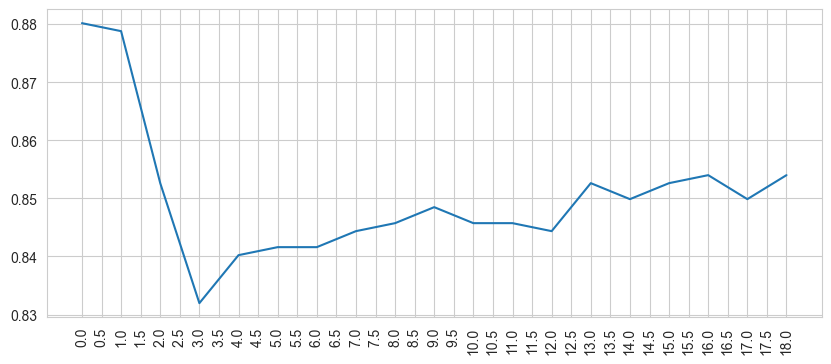

In [465]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 4))
plt.plot(np.array(acc_score_list)[:, 1])
plt.xticks(np.arange(0, 18.5, 0.5), rotation = 90)
plt.show()

In [466]:
top_col=SelectKBest(mutual_info_classif, k = 2)
top_col.fit(X_train, y_train)
top_k_features = X_train.columns[top_col.get_support()].to_list()

k_features_X_train = X_train[top_k_features].values
k_features_X_test = X_test[top_k_features].values
k_features_y_train = y_train.values
k_features_y_test = y_test.values

model_nb = GaussianNB()
model_nb.fit(k_features_X_train, k_features_y_train)

y_pred_nb = model_nb.predict(k_features_X_test)
verbose_result(y_pred_nb, k_features_y_test)

scores = cross_val_score(model_nb, k_features_X_train, k_features_y_train, cv = 2)
print("With Scaling and With Cross-Validation: ", scores.mean())

Precision :  0.8787878787878788
Recall :  0.8787878787878788
Accuracy :  0.8787878787878788
F1 Score :  0.8787878787878788
With Scaling and With Cross-Validation:  0.8660468319559229


In [467]:
scores_list = []
for i in tqdm(range(2, 50), ncols = 100):
    scores_list.append(cross_val_score(model_nb, k_features_X_train, k_features_y_train, scoring = 'accuracy', cv = i).mean())

print(f"Maximum scores is {np.max(np.array(scores_list))} at {np.argmax(np.array(scores_list)) + 2} cv value")

100%|███████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 21.27it/s]

Maximum scores is 0.8660468319559229 at 2 cv value


In [468]:
print(build_classification_rep(y_pred_nb, k_features_y_test))

\begin{table}[ht]
  \centering
  \caption{Classiication Report: Logistic Regression Model}
  \label{tab:6}
  \begin{tabular}{|c|c|c|c|c|c|}
    \hline
    \rule{0pt}{10pt}
    \textb{Class} & \textb{Precision} & \textb{Recall} & \textb{F1-Score} & \textbf{Support} \
    \hline
    \rule{0pt}{10pt}
     fNon-Dropout & f85.62\% & f95.58\% & f90.33\% & f430.0 \
     fDropout & f92.28\% & f76.69\% & f83.76\% & f296.0 \
    \hline
ule{0pt}{10pt}
    
     Accuracy & & & 87.88\% & 726.0 \
     fMacro Avg. & f88.95\% & f86.14\% & f87.05\% & f726.0 \
     fWeighted Avg. & f88.34\% & f87.88\% & f87.65\% & f726.0 \
    
    \hline    
  \end{tabular}
  space{10pt}
\end{table}


#### With BernoulliNB(), with Scaling with MinMaxScaler()

In [469]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 5)

train_scaler = StandardScaler()

acc_score_list = []
for i in tqdm(range(1, 20), ncols = 100):
    top_col=SelectKBest(mutual_info_classif, k = i)
    top_col.fit(X_train, y_train)
    top_k_features = X_train.columns[top_col.get_support()].to_list()

    k_features_X_train = X_train[top_k_features]
    k_features_X_train = train_scaler.fit_transform(k_features_X_train)
    
    k_features_X_test = X_test[top_k_features]
    k_features_X_test = train_scaler.transform(k_features_X_test)
    k_features_y_train = y_train.values
    k_features_y_test = y_test.values

    model_nb = BernoulliNB()
    model_nb.fit(k_features_X_train, k_features_y_train)

    y_pred_nb = model_nb.predict(k_features_X_test)
    acc_score_list.append((i, accuracy_score(y_pred_nb, k_features_y_test)))

100%|███████████████████████████████████████████████████████████████| 19/19 [00:08<00:00,  2.33it/s]


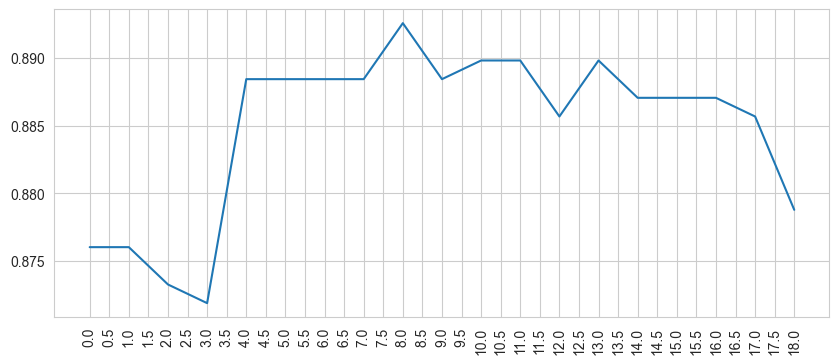

In [470]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 4))
plt.plot(np.array(acc_score_list)[:, 1])
plt.xticks(np.arange(0, 18.5, 0.5), rotation = 90)
plt.show()

In [471]:
train_scaler = StandardScaler()
top_col=SelectKBest(mutual_info_classif, k = 9)
top_col.fit(X_train, y_train)
top_k_features = X_train.columns[top_col.get_support()].to_list()

k_features_X_train = X_train[top_k_features]
k_features_X_train = train_scaler.fit_transform(k_features_X_train)

k_features_X_test = X_test[top_k_features]
k_features_X_test = train_scaler.transform(k_features_X_test)
k_features_y_train = y_train.values
k_features_y_test = y_test.values

model_nb = BernoulliNB()
model_nb.fit(k_features_X_train, k_features_y_train)

y_pred_nb = model_nb.predict(k_features_X_test)
verbose_result(y_pred_nb, k_features_y_test)

scores = cross_val_score(model_nb, k_features_X_train, k_features_y_train, cv = 5)
print("With Scaling and With Cross-Validation: ", scores.mean())

Precision :  0.8911845730027548
Recall :  0.8911845730027548
Accuracy :  0.8911845730027548
F1 Score :  0.8911845730027548
With Scaling and With Cross-Validation:  0.8712166894177698


In [472]:
scores_list = []
for i in tqdm(range(2, 50), ncols = 100):
    scores_list.append(cross_val_score(model_nb, k_features_X_train, k_features_y_train, scoring = 'accuracy', cv = i).mean())

print(f"Maximum scores is {np.max(np.array(scores_list))} at {np.argmax(np.array(scores_list)) + 2} cv value")

100%|███████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 13.99it/s]

Maximum scores is 0.8722451790633609 at 2 cv value


In [473]:
print(build_classification_rep(y_pred_nb, k_features_y_test))

\begin{table}[ht]
  \centering
  \caption{Classiication Report: Logistic Regression Model}
  \label{tab:6}
  \begin{tabular}{|c|c|c|c|c|c|}
    \hline
    \rule{0pt}{10pt}
    \textb{Class} & \textb{Precision} & \textb{Recall} & \textb{F1-Score} & \textbf{Support} \
    \hline
    \rule{0pt}{10pt}
     fNon-Dropout & f88.24\% & f94.19\% & f91.11\% & f430.0 \
     fDropout & f90.64\% & f81.76\% & f85.97\% & f296.0 \
    \hline
ule{0pt}{10pt}
    
     Accuracy & & & 89.12\% & 726.0 \
     fMacro Avg. & f89.44\% & f87.97\% & f88.54\% & f726.0 \
     fWeighted Avg. & f89.21\% & f89.12\% & f89.02\% & f726.0 \
    
    \hline    
  \end{tabular}
  space{10pt}
\end{table}


#                                                          THE END